# Visualisation
## Basic settings for all figures

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
from folium import Polygon
import pandas as pd
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from matplotlib.ticker import FuncFormatter
import numpy as np

In [ ]:
# Please change the path below
cp = 'path_to_SpatialOpt'

#setting path
shapefile_path_bdr = cp + "Visualisation/data/Aichi_city_boundaries/N03-19_23_190101.shp"
shapefile_path = cp + "Visualisation/data/undisclosed_hazardmap/A31-12_23_ToyohashiWGS2.shp"
shapefile_path_lc = cp + "Visualisation/data/Land_classification/A29-19_23201.shp"
shapefile_path_road = cp + "Visualisation/data/road/N10-15_23.shp"
shapefile_path_station = cp + "Visualisation/data/railroad/N02-22_Station.shp"
shapefile_path_railroad = cp + "Visualisation/data/railroad/N02-22_RailroadSection.shp"
shapefile_path_river = cp + "Visualisation/data/river/Toyokawa_river.shp"
shapefile_path_grid = cp + "Visualisation/data/grid/Toyohashi_grid.shp"
csv_path_scenario = cp + "/Model/in/multi_hazard.csv"
csv_path_lp = cp + "/LandPrice/out/estimated_chika.csv"
csv_path_lp_noNA = cp + "/LandPrice/out/estimated_chika_noNA.csv"
shapefile_path_river = cp + "Visualisation/data/river/Toyokawa_river.shp"
encoding = "shift-jis"

In [ ]:
# read shapefile
gdf = gpd.read_file(shapefile_path, encoding=encoding)
bdr = gpd.read_file(shapefile_path_bdr, encoding=encoding)
lc = gpd.read_file(shapefile_path_lc, encoding=encoding)
road = gpd.read_file(shapefile_path_road, encoding=encoding)
station = gpd.read_file(shapefile_path_station, encoding=encoding)
railroad = gpd.read_file(shapefile_path_railroad, encoding=encoding)
river = gpd.read_file(shapefile_path_river, encoding=encoding)

# read shapefile
grid = gpd.read_file(shapefile_path_grid, encoding=encoding)

In [ ]:
landprice_noNA = pd.read_csv(csv_path_lp_noNA, encoding=encoding)
landprice = pd.read_csv(csv_path_lp, encoding=encoding)

In [ ]:
#read csvfile
scenario = pd.read_csv(csv_path_scenario, encoding=encoding)
landprice = pd.read_csv(csv_path_lp, encoding=encoding)
landprice_noNA = pd.read_csv(csv_path_lp_noNA, encoding=encoding)

In [ ]:
#filtering
target_city = '豊橋市'
bdr_target_city = bdr[bdr['N03_004'] == target_city]

## Target area: Toyohashi map

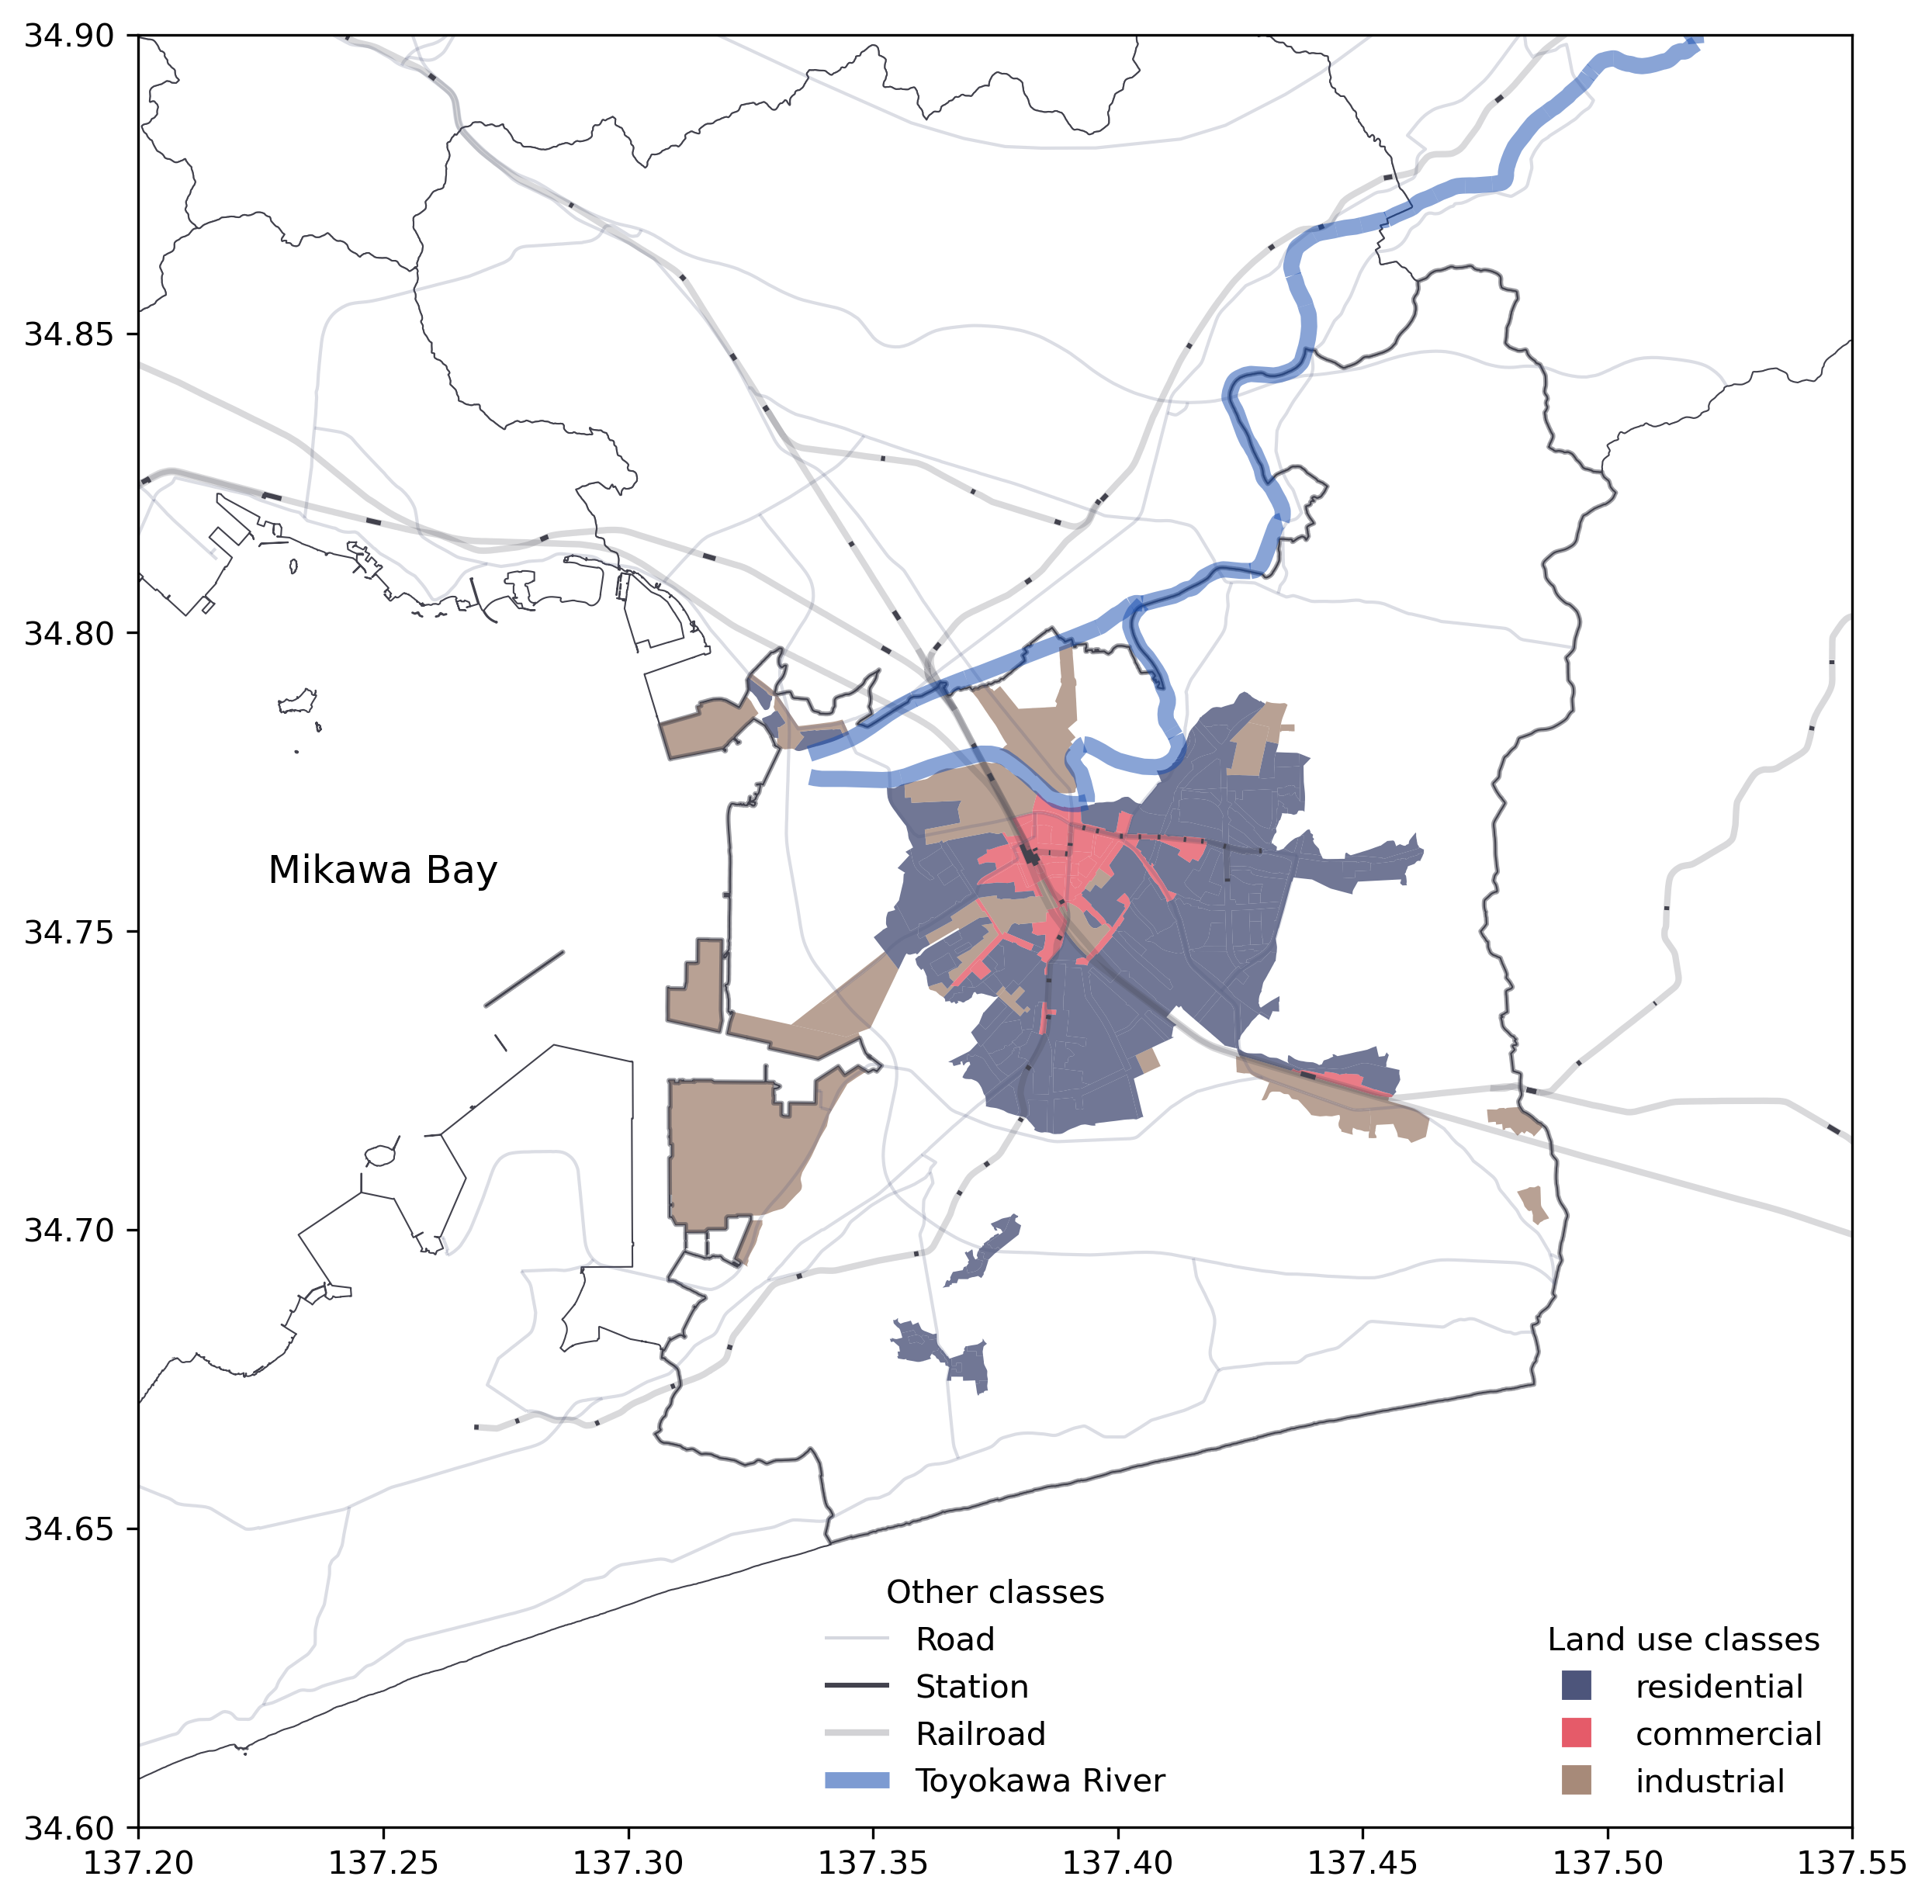

In [359]:
# spatial extent
min_lon, max_lon = 137.2, 137.55
min_lat, max_lat = 34.6, 34.9

# setting the extent of geometry
geometry = [Polygon([(min_lon, min_lat), (max_lon, min_lat), (max_lon, max_lat), (min_lon, max_lat)])]
#gdf_pref = gpd.GeoDataFrame(crs='epsg:4612', geometry=geometry)

# setting the campus
fig, ax = plt.subplots(1, 1, figsize=(10, 10), dpi = 300)

# visualisation

# city boundary
bdr.plot(ax=ax,
         color='white',
         edgecolor='#42424d',
         linewidth=0.5)

#target city
bdr_target_city.boundary.plot(ax=ax, facecolor= 'none', edgecolor='#42424d', alpha = 0.5)

# land classification
colors = {1: '#4d557b', 2: '#4d557b', 3: '#4d557b', 4: '#4d557b', 5: '#4d557b', 6: '#4d557b', 7: '#4d557b',
          8: '#e55b69', 9: '#e55b69', 10: '#a78a79', 11: '#a78a79', 12: '#a78a79'}
lc.plot(ax=ax, color=lc['A29_004'].map(colors).fillna('black'),alpha = 0.8,legend=True)

# road
road.plot(ax=ax, color='#4d557b', alpha=0.2, linewidth=1, label='Road')

# station
station.plot(ax=ax, color='#42424d', alpha=1, markersize=3.5, label='Station')

# railroad
railroad.plot(ax=ax, color='#42424d', alpha=0.2, linewidth=2, label='Railroad')

# river
river.plot(ax=ax, color='#144baf', alpha=0.5, linewidth=5, label='Toyokawa River')

# Update legend_labels dictionary
legend_labels = {
    1: 'residential', 2: 'residential', 3: 'residential', 4: 'residential', 5: 'residential',
    6: 'residential', 7: 'residential', 8: 'commercial', 9: 'commercial', 
    10: 'industrial', 11: 'industrial', 12: 'industrial'
}
selected_labels = [1, 8, 12]

# Create legend handles only for selected labels
selected_handles = [plt.Line2D([1], [1], marker='s', color='w', label=legend_labels[i], 
                                markerfacecolor=colors[i], markersize=10) for i in selected_labels]

# Add the first legend to the plot
legend1 = ax.legend(handles=selected_handles, loc='lower right', title='Land use classes')
legend1.get_frame().set_linewidth(0)  # This line removes the border around the legend box

# Create a second legend for other data
handles, labels = ax.get_legend_handles_labels()
legend2 = ax.legend(handles, labels, loc='lower center', title='Other classes')
legend2.get_frame().set_linewidth(0)  # This line removes the border around the legend box

# Add both legends to the plot
ax.add_artist(legend1)
ax.add_artist(legend2)

ax.set_xlim(min_lon, max_lon)
ax.set_ylim(min_lat, max_lat)

#ax.set_title( 'Current land use of Toyohashi city', fontsize=20)
ax.text(137.25, 34.76, 'Mikawa Bay', fontsize=12, ha='center', va='center', color='black')

# Save the figure to the specified folder
plt.savefig('fig/Toyohashi.png')
#plt.show()

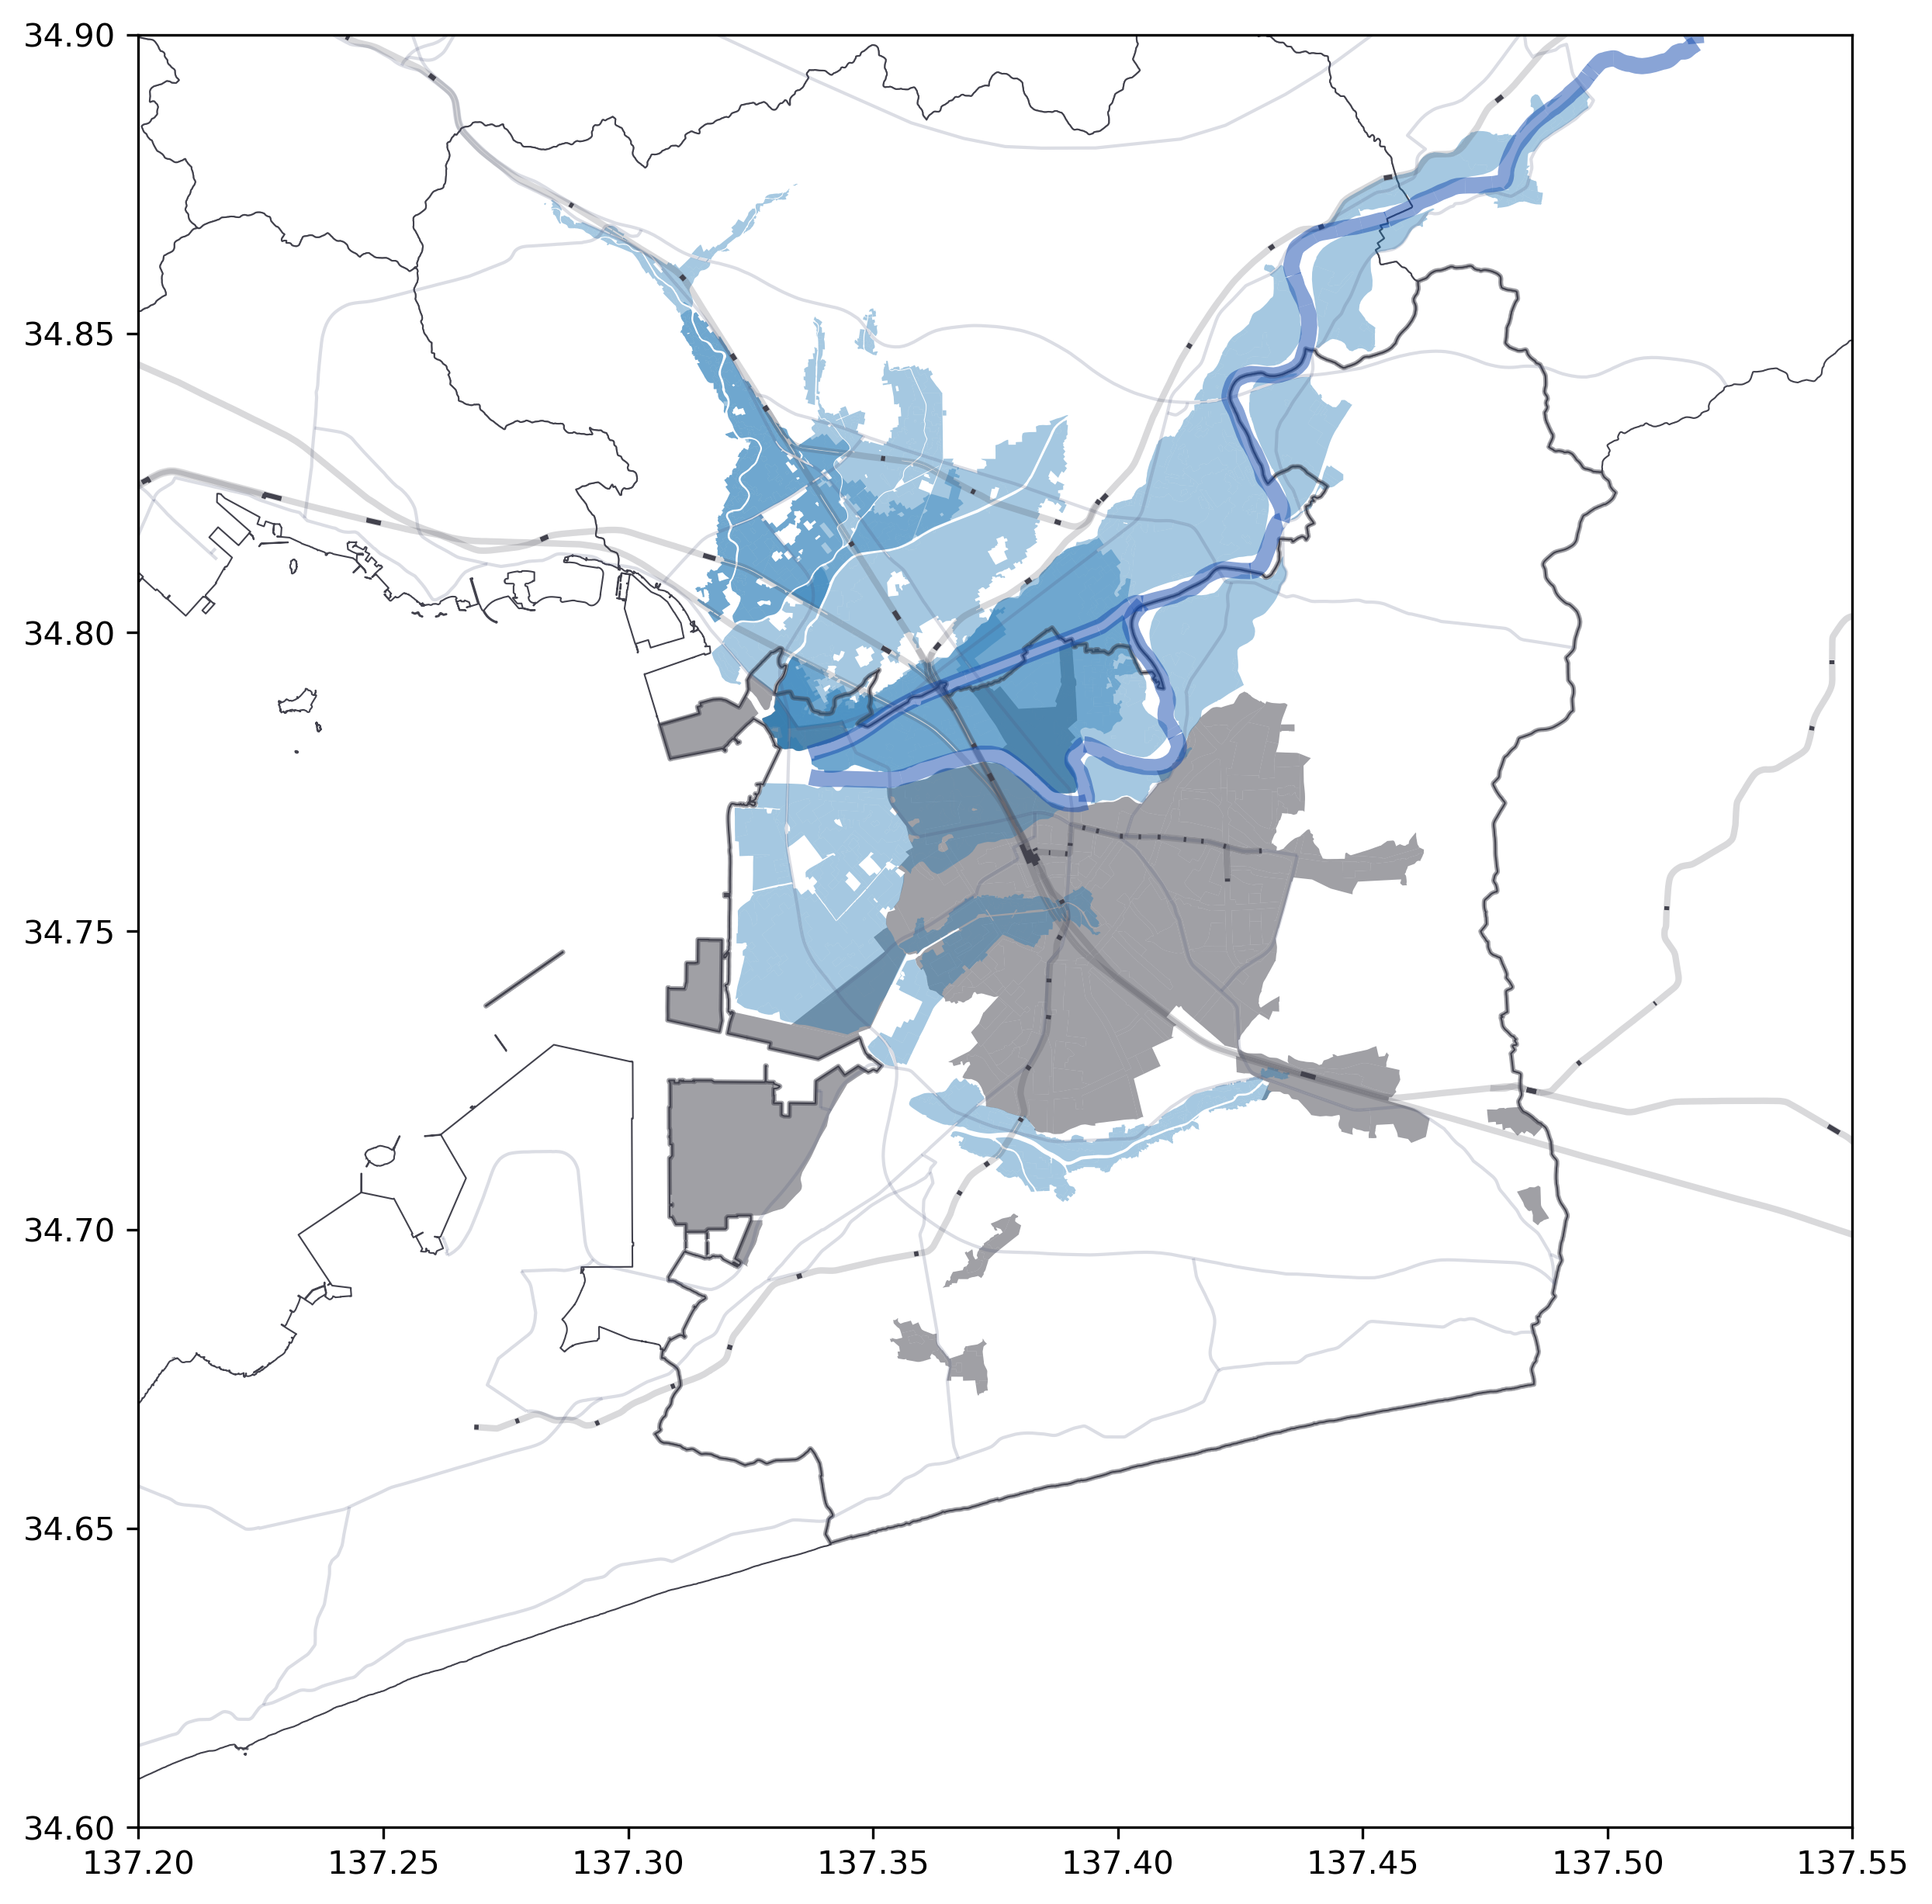

In [361]:
# spatial extent
min_lon, max_lon = 137.2, 137.55
min_lat, max_lat = 34.6, 34.9

# setting the extent of geometry
geometry = [Polygon([(min_lon, min_lat), (max_lon, min_lat), (max_lon, max_lat), (min_lon, max_lat)])]
#gdf_pref = gpd.GeoDataFrame(crs='epsg:4612', geometry=geometry)

# setting the campus
fig, ax = plt.subplots(1, 1, figsize=(10,10), dpi = 300)

# visualisation
# city boundary
bdr.plot(ax=ax,
         color='white',
         edgecolor='#42424d',
         linewidth=0.5)

#target city
bdr_target_city.boundary.plot(ax=ax, facecolor= 'none', edgecolor='#42424d', alpha = 0.5)

# land classification
lc.plot(ax=ax, facecolor = '#42424d', alpha = 0.5)

# road
road.plot(ax=ax, color='#4d557b', alpha=0.2, linewidth=1, label='Road')

# station
station.plot(ax=ax, color='#42424d', alpha=1, markersize=3.5, label='Station')

# railroad
railroad.plot(ax=ax, color='#42424d', alpha=0.2, linewidth=2, label='Railroad')

#hazard
gdf.plot(ax=ax, alpha = 0.4)

# river
river.plot(ax=ax, color='#144baf', alpha=0.5, linewidth=5, label='Toyokawa River')


ax.set_xlim(min_lon, max_lon)
ax.set_ylim(min_lat, max_lat)

# Save the figure to the specified folder
plt.savefig('fig/floodToyohashi.png')
#plt.show()

## Visualising six flood scenarios (2 * 3)

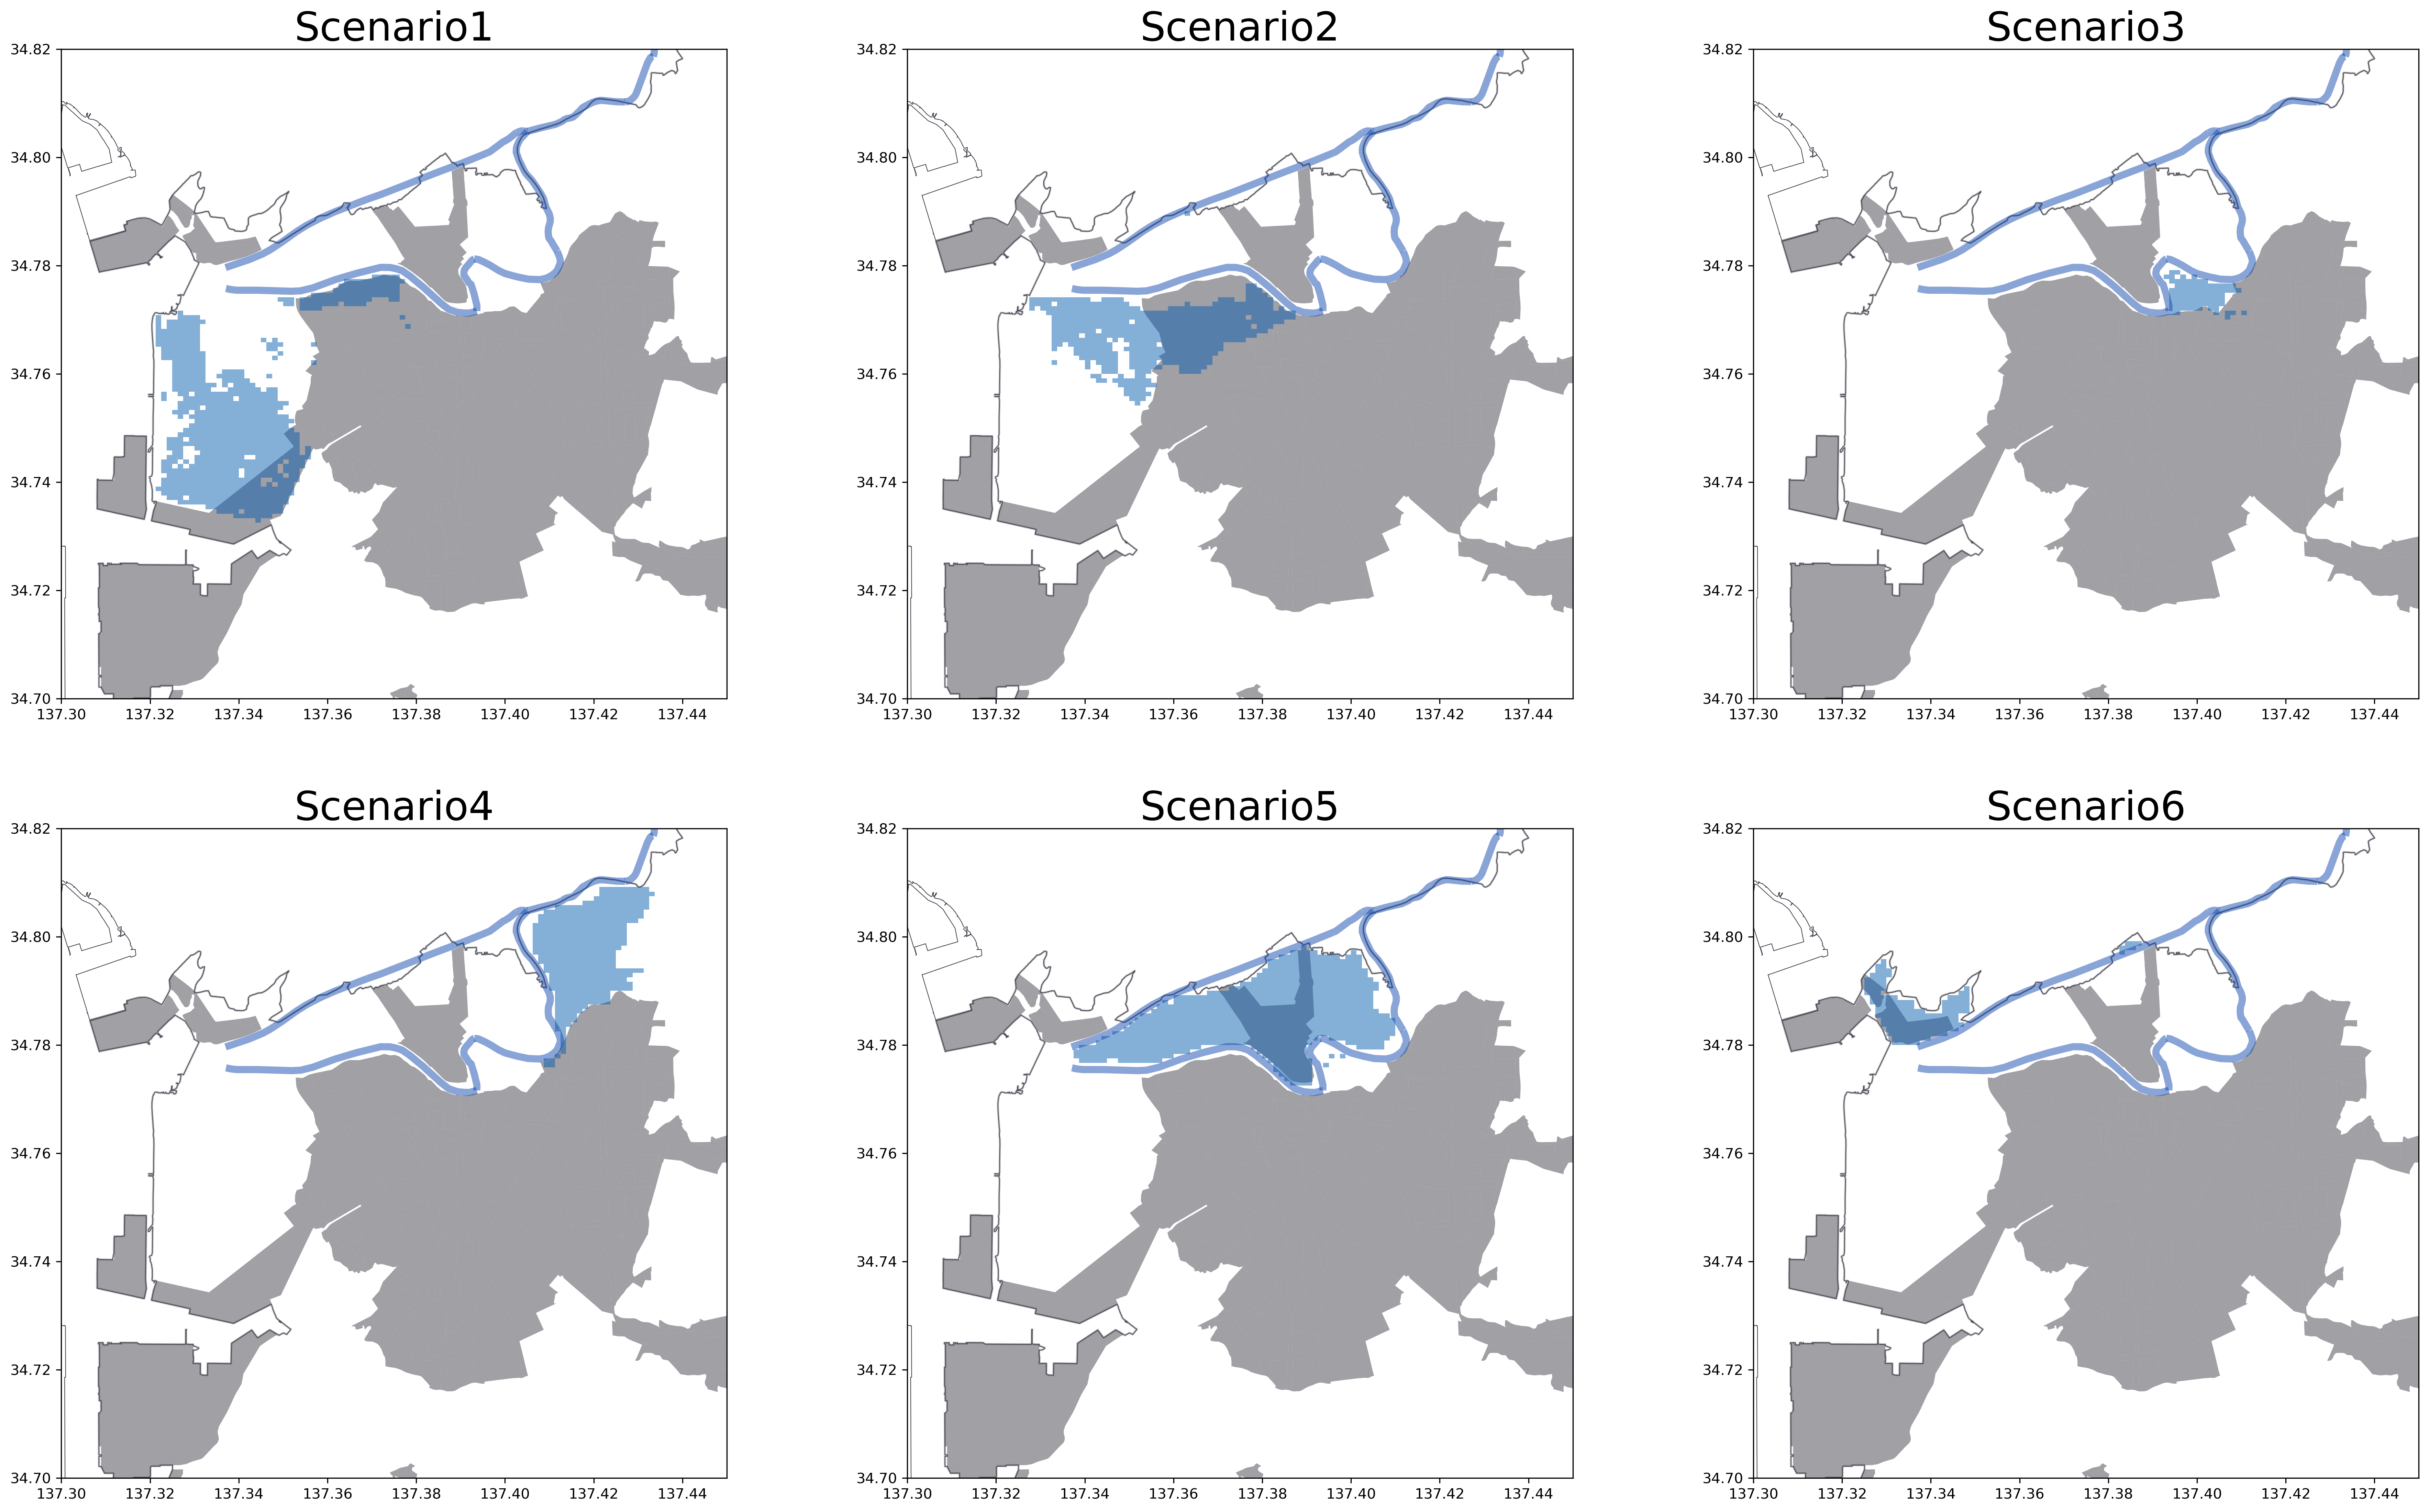

In [325]:
# spatial extent
min_lon, max_lon = 137.3, 137.45
min_lat, max_lat = 34.7, 34.82

# setting the extent of geometry
geometry = [Polygon([(min_lon, min_lat), (max_lon, min_lat), (max_lon, max_lat), (min_lon, max_lat)])]
#gdf_pref = gpd.GeoDataFrame(crs='epsg:4612', geometry=geometry)

# setting the campus
fig, ax = plt.subplots(2, 3, figsize=(30, 18), dpi = 300)

X = [0,0,0,1,1,1]
Y = [0,1,2,0,1,2]
Z = [0,1,2,3,4,5]
name = ['Scenario1', 'Scenario2', 'Scenario3', 'Scenario4', 'Scenario5', 'Scenario6']

# visualisation
for x,y,z in zip(X,Y,Z):

    # city boundary
    bdr.plot(ax=ax[x,y], color='white', edgecolor='#42424d', linewidth=0.5)
    
    # land classification
    lc.plot(ax=ax[x,y], facecolor='#42424d', alpha=0.5)
    
    # target city
    bdr_target_city.boundary.plot(ax=ax[x,y], facecolor='none', edgecolor='#42424d', alpha=0.3)
    
    # scenario
    grid_scenario_selected = grid_scenario[grid_scenario[scenario_list[z]] == 1]

    #grid_scenario.plot(ax=ax[x], column=scenario_list[x], edgecolor='#FE7A36', facecolor='none')
    grid_scenario_selected.plot(ax=ax[x,y], edgecolor='none', facecolor='#0B60B0', alpha=0.5)

    # river
    river.plot(ax=ax[x,y], color='#144baf', alpha=0.5, linewidth=5, label='Toyokawa River')

    # set xlim and ylim for each subplot
    ax[x,y].set_xlim(min_lon, max_lon)
    ax[x,y].set_ylim(min_lat, max_lat)
    
    # set title for each subplot
    ax[x,y].set_title(name[z], fontsize=28)

# Save the figure to the specified folder
#plt.savefig(output_folder + 'Toyohashi_hazardmap.png')
plt.savefig('fig/six_scenario23.png', bbox_inches='tight')

## Estimated Land price

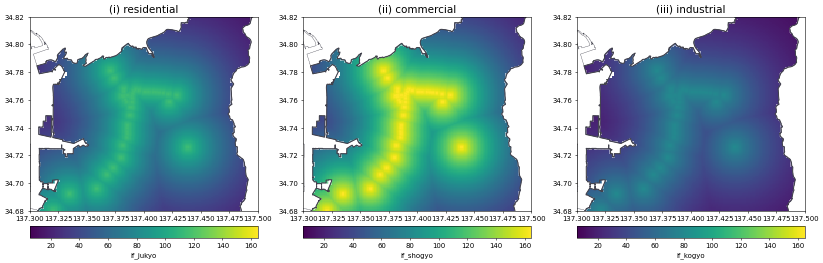

In [329]:
# spatial extent
min_lon, max_lon = 137.3, 137.5
min_lat, max_lat = 34.68, 34.82

# check data type
grid['mesh'] = grid['mesh'].astype(str)
landprice.loc[:, 'ID'] = landprice['ID'].astype(str)

# merge grid shapefile and scenario CSV files
grid_landprice = pd.merge(grid, landprice, left_on='mesh', right_on='ID')

#campus
p_land_cols = ['if_jukyo', 'if_shogyo', 'if_kogyo']
namelist = ['(i) residential', '(ii) commercial','(iii) industrial']

fig,ax = plt.subplots(1, len(p_land_cols), figsize=(20, 40), dpi = 50)
fig.subplots_adjust(wspace=0.2,hspace = 0.5) 

min_value = landprice['if_kogyo'].min()
max_value = landprice['if_shogyo'].max()

norm = Normalize(vmin=min_value / 1000, vmax=max_value / 1000)
cmap = 'viridis'

for u in range(len(p_land_cols)):

    # city boundary
    bdr.plot(ax=ax[u], color='white', edgecolor='#42424d', linewidth=0.5)

    # target city
    bdr_target_city.boundary.plot(ax=ax[u], facecolor='none', edgecolor='#42424d', alpha=1)

    # filtering dataframe plot
    grid_landprice.plot(ax=ax[u], 
                        column=p_land_cols[u],
                        legend=False,
                        vmin=min_value,
                        vmax=max_value,
                        cmap='viridis')

    # set xlim and ylim for each subplot
    ax[u].set_xlim(min_lon, max_lon)
    ax[u].set_ylim(min_lat, max_lat)
    ax[u].set_title(namelist[u], fontsize=15)

    # colour mapping information
    sm = ScalarMappable(norm=norm, cmap=cmap)
    
    # vacant list
    sm.set_array([])

    # add colour bar
    cbar = fig.colorbar(sm, ax=ax[u], orientation='horizontal', fraction=0.02, pad=0.01)
    cbar.set_label(p_land_cols[u])

plt.savefig('fig/landprice.png', bbox_inches='tight')


## Sum of Land price based on original landuse

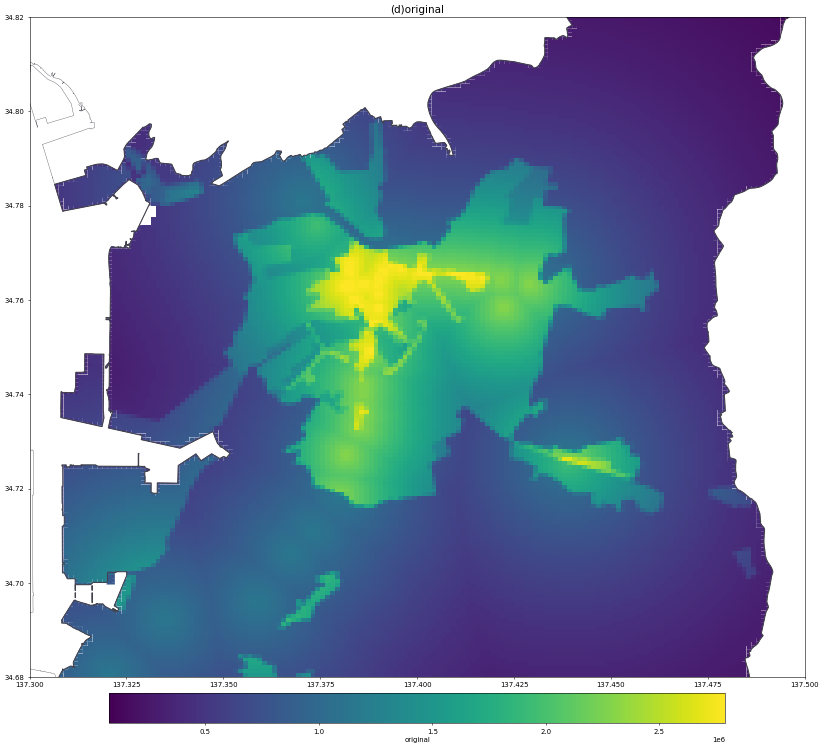

In [362]:
# spatial extent
min_lon, max_lon = 137.3, 137.5
min_lat, max_lat = 34.68, 34.82

# check data type
grid['mesh'] = grid['mesh'].astype(str)
landprice.loc[:, 'ID'] = landprice['ID'].astype(str)

# merge grid shapefile and scenario CSV files
grid_landprice = pd.merge(grid, landprice, left_on='mesh', right_on='ID')

#campus
p_land_cols = ['original']
namelist = ['(d)original']

fig,ax = plt.subplots(1, len(p_land_cols), figsize=(20, 40), dpi = 50)
fig.subplots_adjust(wspace=0.2,hspace = 0.5) 

min_value = landprice['original'].min()
max_value = landprice['original'].max()

norm = Normalize(vmin=min_value / 1000, vmax=max_value / 1000)

cmap = 'viridis'

bdr.plot(ax=ax, color='white', edgecolor='#42424d', linewidth=0.5)

# target city
bdr_target_city.boundary.plot(ax=ax, facecolor='none', edgecolor='#42424d', alpha=1)


# filtering dataframe plot
grid_landprice.plot(ax=ax, 
                    column=p_land_cols[0],
                    legend=False,
                    vmin=min_value,
                    vmax=max_value,
                    cmap='viridis')

# set xlim and ylim for each subplot
ax.set_xlim(min_lon, max_lon)
ax.set_ylim(min_lat, max_lat)
ax.set_title(namelist[0], fontsize=15)

# colour mapping information
sm = ScalarMappable(norm=norm, cmap=cmap)

# vacant list
sm.set_array([])

# add colour bar
cbar = fig.colorbar(sm, ax=ax, orientation='horizontal', fraction=0.02, pad=0.01)
cbar.set_label(p_land_cols[0])

plt.savefig('fig/landprice_est_org.png', bbox_inches='tight')


## Optimised landuse

## X: Scenario, Y: optval

## X: Hazard, Y: optval

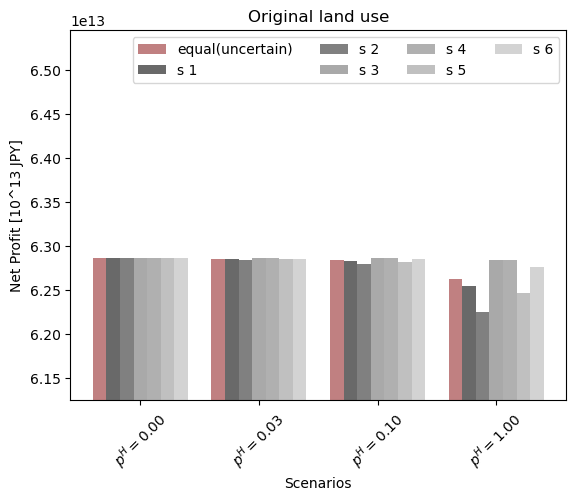

In [367]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Path
encoding = "shift-jis"

# Read CSV files
scenarioCSV = pd.read_csv(cp + "/model/out_01/optval.csv", encoding=encoding)
original = pd.read_csv(cp + "/model/out_01/optvalt.csv", encoding=encoding)
original.rename(columns={'val.opt': 'val.opt.org'}, inplace=True)

# Merge DataFrames
df = pd.merge(scenarioCSV[['h', 's', 'e', 'q', 'val.opt']], original[['h', 's', 'e', 'q', 'val.opt.org']], on=['h', 's', 'e', 'q'], how='inner')
df['diff'] = df['val.opt'] - df['val.opt.org']

# Filter data for plotting
df_filtered = df[df['e'] == 0]

miny = df_filtered['val.opt.org'].min() - pow(10,12)
maxy = df_filtered['val.opt'].max() + pow(10,12)

# List of unique 'h' values
s_values = df_filtered['s'].unique()

# Generate x-axis positions
x_axis = np.arange(len(df_filtered[df_filtered['s'] == s_values[0]]))

# Bar width
bar_width = 0.8 / len(s_values)

labels = ['equal(uncertain)', 's 1', 's 2', 's 3', 's 4', 's 5', 's 6']
# Defined color palette
colors = [
    "#C08081",  # Subdued red (Dark Red)
    "#696969",  # Dark gray 1 (Dim Gray)
    "#808080",  # Gray 2 (Gray)
    "#A9A9A9",  # Dark gray 3 (Dark Gray)
    "#B0B0B0",  # Light gray 4 (Light Gray)
    "#C0C0C0",  # Gray 5 (Silver)
    "#D3D3D3"   # Light gray 6 (Light Gray)
]

# Plot bars for each 'h' value
for i, s in enumerate(s_values):
    subset = df_filtered[df_filtered['s'] == s]
    plt.bar(x_axis + i * bar_width - (0.4 - bar_width / 2), subset['val.opt.org'], width=bar_width, label=labels[s],color = colors[s])
    
# # Set y-axis limits
plt.ylim([miny,maxy])

# Define custom x-axis labels
custom_labels = ['$p^H=0.00$','$p^H=0.03$','$p^H=0.10$','$p^H=1.00$']

# Adjust x-axis positions to match the number of custom labels
plt.xticks(x_axis, custom_labels, rotation=45)

# ラベルやタイトルを設定
plt.xlabel('Scenarios')
plt.ylabel('Net Profit [10^13 JPY]')
plt.title('Original land use')

# 凡例を表示
plt.legend(ncol=4)

# Save plot as a PNG file
plt.savefig(cp + 'Visualisation/fig/optval_org_h.png', dpi=300, bbox_inches='tight')

# Optionally, close the plot to free up memory
#plt.close()


    h  s  e  q       val.opt   val.opt.org          diff
0   0  0  0  0  6.445506e+13  6.286382e+13  1.591240e+12
21  1  0  0  0  6.444763e+13  6.285660e+13  1.591025e+12
42  2  0  0  0  6.443035e+13  6.283977e+13  1.590575e+12
63  3  0  0  0  6.421557e+13  6.262333e+13  1.592234e+12
    h  s  e  q       val.opt   val.opt.org          diff
3   0  1  0  0  6.445506e+13  6.286382e+13  1.591240e+12
24  1  1  0  0  6.444889e+13  6.285448e+13  1.594416e+12
45  2  1  0  0  6.443488e+13  6.283268e+13  1.602205e+12
66  3  1  0  0  6.429176e+13  6.255240e+13  1.739352e+12
    h  s  e  q       val.opt   val.opt.org          diff
6   0  2  0  0  6.445506e+13  6.286382e+13  1.591240e+12
27  1  2  0  0  6.443697e+13  6.284570e+13  1.591268e+12
48  2  2  0  0  6.439477e+13  6.280342e+13  1.591358e+12
69  3  2  0  0  6.392181e+13  6.225978e+13  1.662027e+12
    h  s  e  q       val.opt   val.opt.org          diff
9   0  3  0  0  6.445506e+13  6.286382e+13  1.591240e+12
30  1  3  0  0  6.445402e+13  6

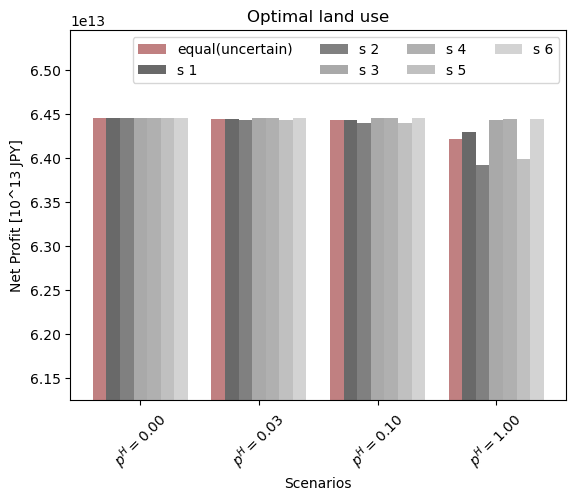

In [368]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Path
encoding = "shift-jis"

# Read CSV files
scenarioCSV = pd.read_csv(cp + "/Model/out_01/optval.csv", encoding=encoding)
original = pd.read_csv(cp + "/Model/out_01/optvalt.csv", encoding=encoding)
original.rename(columns={'val.opt': 'val.opt.org'}, inplace=True)

# Merge DataFrames
df = pd.merge(scenarioCSV[['h', 's', 'e', 'q', 'val.opt']], original[['h', 's', 'e', 'q', 'val.opt.org']], on=['h', 's', 'e', 'q'], how='inner')
df['diff'] = df['val.opt'] - df['val.opt.org']

# Filter data for plotting
df_filtered = df[df['e'] == 0]

miny = df_filtered['val.opt.org'].min() - pow(10,12)
maxy = df_filtered['val.opt'].max() + pow(10,12)

# List of unique 'h' values
s_values = df_filtered['s'].unique()

# Generate x-axis positions
x_axis = np.arange(len(df_filtered[df_filtered['s'] == s_values[0]]))

# Bar width
bar_width = 0.8 / len(s_values)

labels = ['equal(uncertain)', 's 1', 's 2', 's 3', 's 4', 's 5', 's 6']
# Defined color palette
colors = [
    "#C08081",  # Subdued red (Dark Red)
    "#696969",  # Dark gray 1 (Dim Gray)
    "#808080",  # Gray 2 (Gray)
    "#A9A9A9",  # Dark gray 3 (Dark Gray)
    "#B0B0B0",  # Light gray 4 (Light Gray)
    "#C0C0C0",  # Gray 5 (Silver)
    "#D3D3D3"   # Light gray 6 (Light Gray)
]
# Plot bars for each 'h' value
for i, s in enumerate(s_values):
    subset = df_filtered[df_filtered['s'] == s]
    plt.bar(x_axis + i * bar_width - (0.4 - bar_width / 2), subset['val.opt'], width=bar_width, label=labels[s],color = colors[s])
    print(df_filtered[df_filtered['s'] == s])

# # Set y-axis limits
plt.ylim([miny,maxy])

# Define custom x-axis labels
custom_labels = ['$p^H=0.00$','$p^H=0.03$','$p^H=0.10$','$p^H=1.00$']

# Adjust x-axis positions to match the number of custom labels
plt.xticks(x_axis, custom_labels, rotation=45)

# ラベルやタイトルを設定
plt.xlabel('Scenarios')
plt.ylabel('Net Profit [10^13 JPY]')
plt.title('Optimal land use')

# 凡例を表示
plt.legend(ncol=4)

# Save plot as a PNG file
plt.savefig(cp + 'Visualisation/fig/optval_opt_h.png', dpi=300, bbox_inches='tight')

# Optionally, close the plot to free up memory
#plt.close()


## Optimal land use figures

### optXXXX.png with infrastructure data

/Users/fukonakai/Documents/GitHub/optLanduse//Model/out_01/f/t0000.csv


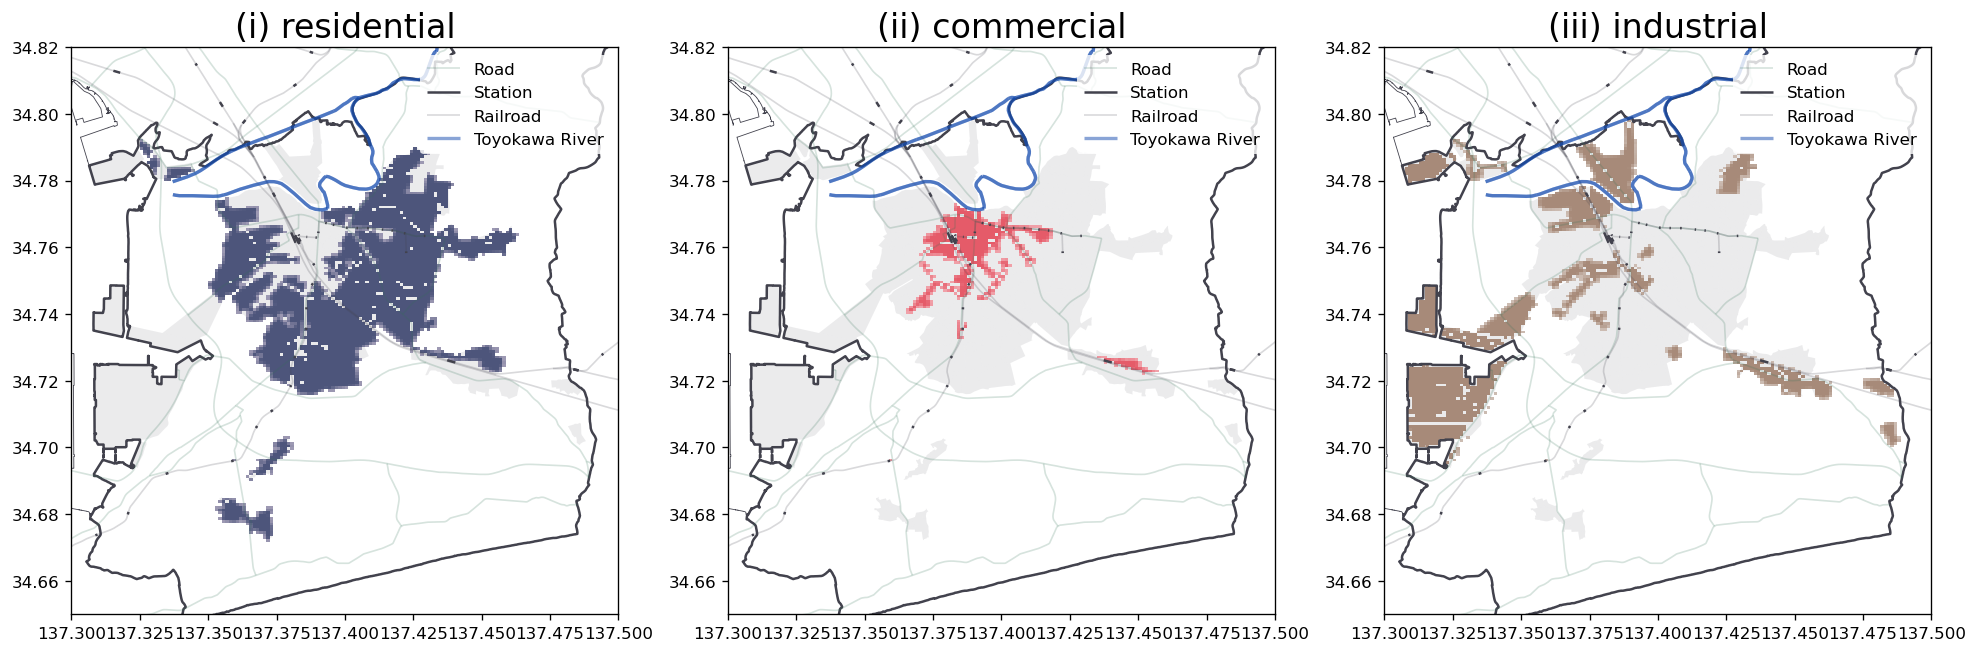

In [338]:
from matplotlib.colors import LinearSegmentedColormap

landuse = ['optL','optS','optM']

U = [0,1,2]
# H = [0,1,2,3]
# S = [0,1,2,3,4,5,6]
# E = [0,3,5]
# Q = [0,1]


H = [0]
S = [0]
E = [0]
Q = [0]

#colour map
colorsL = ['#9D99B3','#4d557b']  # from which color to which color?
colorsS = ['#F0A1A9','#e55b69']  # from which color to which color?
colorsM = ['#CCBCB2','#a78a79']  # from which color to which color?
cmap_name = 'custom_gradient'
n_bins = 100  # number of color bins
cmL = LinearSegmentedColormap.from_list(cmap_name, colorsL, N=n_bins)
cmS = LinearSegmentedColormap.from_list(cmap_name, colorsS, N=n_bins)
cmM = LinearSegmentedColormap.from_list(cmap_name, colorsM, N=n_bins)

colormaps = [cmL, cmS, cmM]

## merge scenario data to shp
#check data type
grid['mesh'] = grid['mesh'].astype(str)
scenario['ID'] = scenario['ID'].astype(str)

# #scenario
scenario_list = ['mh01', 'mh02', 'mh03', 'mh04', 'mh06', 'mh07']
scenario['all'] = scenario[scenario_list].gt(0).any(axis=1).astype(int)

# merge grid shapefile and scenario CSV files
gridscenario = pd.merge(grid, scenario, left_on='mesh', right_on='ID')

# scenario list for label
scenario_listlabel = ['all', 'mh01', 'mh02', 'mh03', 'mh04', 'mh06', 'mh07']

# spatial extent
min_lon, max_lon = 137.3, 137.5
min_lat, max_lat = 34.65, 34.82

# setting the extent of geometry
geometry = [Polygon([(min_lon, min_lat), (max_lon, min_lat), (max_lon, max_lat), (min_lon, max_lat)])]

for q in Q:
    for h in H:
        for s in S:
            for e in E:
                    
                #read csv
                # csv_path_f = f'{cp}/Model/out_01/f/f{h}{s}{e}{q}.csv'
                csv_path_f = f'{cp}/model/out_01/f/t{h}{s}{e}{q}.csv'
                print(csv_path_f)
                f = pd.read_csv(csv_path_f, encoding=encoding)

                # check data type
                f.loc[:, 'ID'] = f['ID'].astype(str)

                # merge grid shapefile and scenario CSV files
                grid_f = pd.merge(grid, f, left_on='mesh', right_on='ID')

                #campus
                fig,ax = plt.subplots(1, len(U), figsize=(20, 40), dpi = 120)

                fig.subplots_adjust(wspace=0.2,hspace = 0.5) 

                # filtering scenario[scenario_list[s]]>0
                gcs = gridscenario[gridscenario['all'].fillna(0) != 0]
                namelist = ['(i) residential', '(ii) commercial','(iii) industrial',]

                for u in [0,1,2]:
                    
                    # city boundary
                    bdr.plot(ax=ax[u], color='white', edgecolor='#42424d', linewidth=0.5)

                    # target city
                    bdr_target_city.boundary.plot(ax=ax[u], facecolor='none', edgecolor='#42424d', alpha=1)

                    # land classification
                    lc.plot(ax=ax[u], facecolor='#42424d', alpha=0.1)

                    #result
                    min_value = grid_f[landuse[u]].min()
                    max_value = grid_f[landuse[u]].max()

                    # filtering landuse[u]>0
                    grid_f_filtered = grid_f[grid_f[landuse[u]] != 0]

                    # filtering dataframe plot
                    grid_f_filtered.plot(ax=ax[u], column=landuse[u], cmap=colormaps[u], vmin=min_value, vmax=max_value)

                    # road
                    road.plot(ax=ax[u], color='#337357', alpha=0.2, linewidth=1, label='Road')

                    # station
                    station.plot(ax=ax[u], color='#42424d', alpha=1, markersize=5, label='Station')

                    # railroad
                    railroad.plot(ax=ax[u], color='#42424d', alpha=0.2, linewidth=1, label='Railroad')

                    if h != 0:
                        # filtering scenario[scenario_list[s]]>0
                        grid_scenario_filtered = grid_scenario[grid_scenario[scenario_listlabel[s]] != 0]
                        
                        # # filtering dataframe plot
                        # grid_scenario_filtered.plot(ax=ax[u], column = scenario_list[s], edgecolor='none', alpha=0.3)
                        grid_scenario_filtered.plot(ax=ax[u], edgecolor='none',color='#0B60B0', alpha=0.3)

                    # river
                    river.plot(ax=ax[u], color='#144baf', alpha=0.5, linewidth=2, label='Toyokawa River')
                    river.plot(ax=ax[u], color='#144baf', alpha=0.5, linewidth=2, label='Toyokawa River')
                    
                    # set xlim and ylim for each subplot
                    ax[u].set_xlim(min_lon, max_lon)
                    ax[u].set_ylim(min_lat, max_lat)
                    ax[u].set_title(namelist[u], fontsize=20)

                    # Create a second legend for other data
                    handles, labels = ax[u].get_legend_handles_labels()
                    legend2 = ax[u].legend(handles[0:4], labels[0:4], loc='upper right')
                    legend2.get_frame().set_linewidth(0)  # This line removes the border around the legend box

                #plt.savefig(cp + '/fig/3in1/' +str(h)+str(s)+str(e)+'.png')
                #plt.savefig(cp + 'Visualisation/fig/optbase_E025.png', bbox_inches='tight')
                #plt.savefig(cp + 'Visualisation/fig/optbaseline.png', bbox_inches='tight')
                # plt.savefig(cp + f'Visualisation/fig/opt{h}{s}{e}{q}.png', bbox_inches='tight')
                plt.savefig(cp + f'Visualisation/fig/opt_org{h}{s}{e}{q}.png', bbox_inches='tight')

                #plt.show()

## Differences of optimal land use

/Users/fukonakai/anaconda3/lib/python3.11/site-packages/geopandas/geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/fukonakai/anaconda3/lib/python3.11/site-packages/geopandas/geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/fukonakai/anaconda3/lib/python3.11/site-packages/geopandas/geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


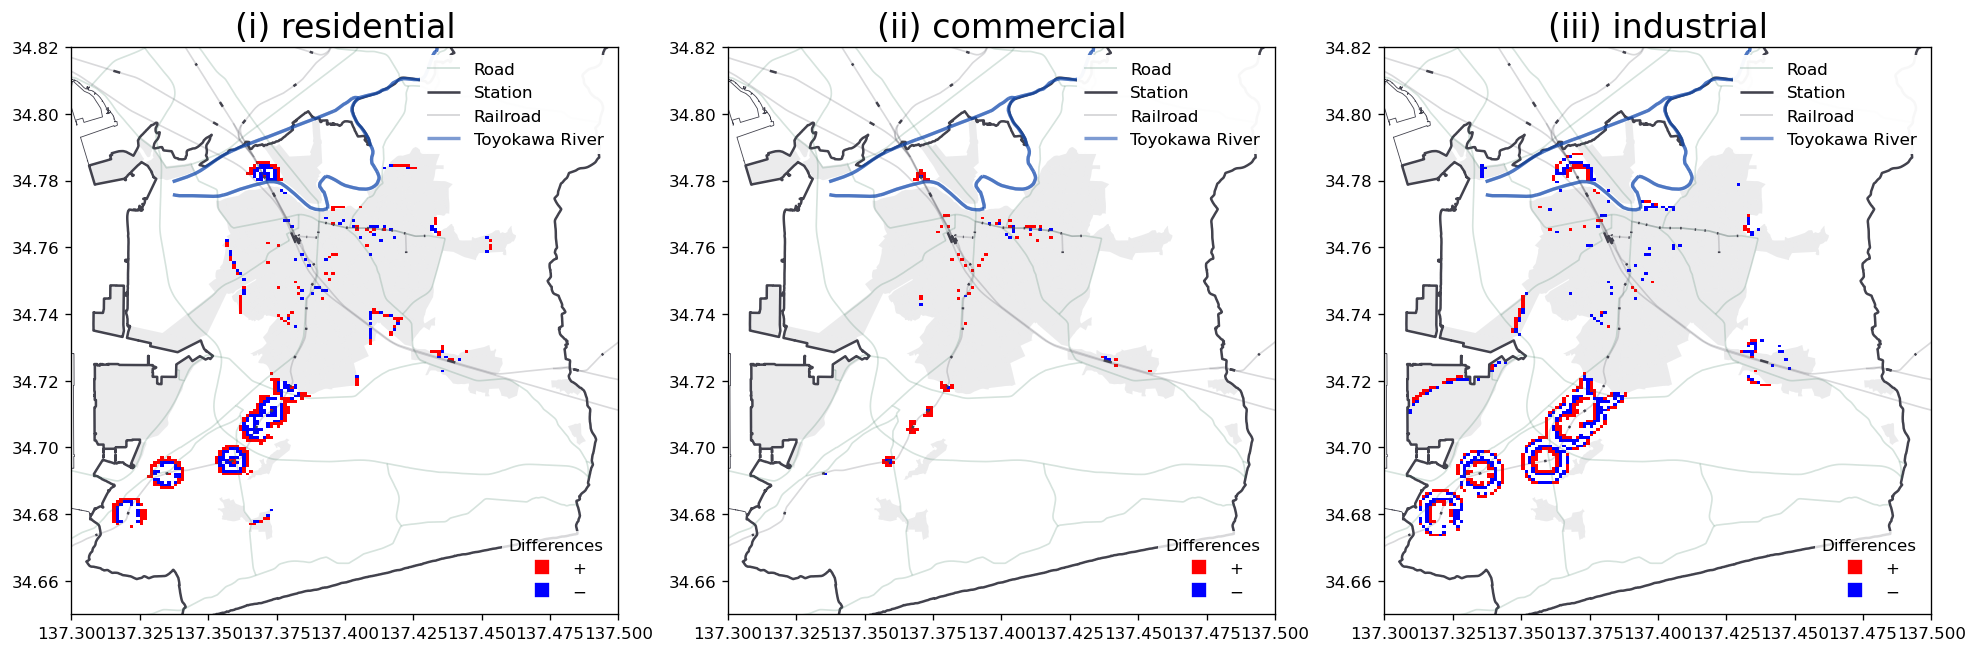

In [369]:
# 
# single scenario
# 
# 0.00と0.10の比較

from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

## merge scenario data to shp
#check data type
grid['mesh'] = grid['mesh'].astype(str)
scenario['ID'] = scenario['ID'].astype(str)

# #scenario
scenario_list = ['mh01', 'mh02', 'mh03', 'mh04', 'mh06', 'mh07']
scenario['all'] = scenario[scenario_list].gt(0).any(axis=1).astype(int)

# scenario list for label
scenario_listlabel = ['all', 'mh01', 'mh02', 'mh03', 'mh04', 'mh06', 'mh07']

# spatial extent
min_lon, max_lon = 137.3, 137.5
min_lat, max_lat = 34.65, 34.82

# merge grid shapefile and scenario CSV files
gridscenario = pd.merge(grid, scenario, left_on='mesh', right_on='ID')

# setting the extent of geometry
geometry = [Polygon([(min_lon, min_lat), (max_lon, min_lat), (max_lon, max_lat), (min_lon, max_lat)])]

colors = ['red','blue', ]
label_pn = ['+', '\u2212']
cmap = ListedColormap(colors)

landuse = ['optL','optS','optM']

h = 0
s = 0
e = 0
q = 0

E = [0]
for e in E:
    # read data
    result = pd.read_csv(f'{cp}/model/out_01/f/f0000.csv')
    result['ID'] = result['ID'].astype(str)

    result025 = pd.read_csv(f'{cp}/model/out_01/f/f0050.csv')
    result025['ID'] = result025['ID'].astype(str)

    diff = result.copy() 

    diff['optL'] = result025['optL']-result['optL']
    diff['optS'] = result025['optS']-result['optS']
    diff['optM'] = result025['optM']-result['optM']

    grid_opt = pd.merge(gridscenario, diff, left_on='mesh', right_on='ID')

    #campus
    fig,ax = plt.subplots(1, len(U), figsize=(20, 40), dpi = 120)
    fig.subplots_adjust(wspace=0.2,hspace = 0.5) 

    # filtering scenario[scenario_list[s]]>0
    gcs = gridscenario[gridscenario['all'].fillna(0) != 0]
    namelist = ['(i) residential', '(ii) commercial','(iii) industrial',]

    for u in [0,1,2]:
        
        # city boundary
        bdr.plot(ax=ax[u], color='white', edgecolor='#42424d', linewidth=0.5)

        # target city
        bdr_target_city.boundary.plot(ax=ax[u], facecolor='none', edgecolor='#42424d', alpha=1)

        # land classification
        lc.plot(ax=ax[u], facecolor='#42424d', alpha=0.1)

        #result
        # min_value = grid_opt[f'opt{U[u]}'].min()
        # max_value = grid_opt[f'opt{U[u]}'].max()
        min_value = -10000
        max_value = 10000

        # filtering landuse[u]>0
        grid_f_filtered = grid_opt[grid_opt[landuse[u]] != 0]
        grid_f_filtered.loc[:, 'color'] = np.where(grid_f_filtered[landuse[u]] > 0, 0, 1)

        # filtering dataframe plot
        grid_f_filtered.plot(ax=ax[u], column='color', cmap=cmap, linewidth=0, edgecolor='none')

        # road
        road.plot(ax=ax[u], color='#337357', alpha=0.2, linewidth=1, label='Road')

        # station
        station.plot(ax=ax[u], color='#42424d', alpha=1, markersize=5, label='Station')

        # railroad
        railroad.plot(ax=ax[u], color='#42424d', alpha=0.2, linewidth=1, label='Railroad')

        # # filtering dataframe plot
        if h != 0:
            # filtering scenario[scenario_list[s]]>0
            grid_scenario_filtered = grid_scenario[grid_scenario[scenario_listlabel[s]] != 0]
            
            # # filtering dataframe plot
            grid_scenario_filtered.plot(ax=ax[u], edgecolor='none',color='#0B60B0', alpha=0.3)

        # river
        river.plot(ax=ax[u], color='#144baf', alpha=0.5, linewidth=2, label='Toyokawa River')
        river.plot(ax=ax[u], color='#144baf', alpha=0.5, linewidth=2, label='Toyokawa River')

        # set xlim and ylim for each subplot
        ax[u].set_xlim(min_lon, max_lon)
        ax[u].set_ylim(min_lat, max_lat)
        ax[u].set_title(namelist[u], fontsize=20)

        selected_labels = [0,1]

        # Create legend handles only for selected labels
        selected_handles = [plt.Line2D([1], [1], marker='s', color='w', label=label_pn[i], 
                                        markerfacecolor=colors[i], markersize=10) for i in selected_labels]
    
        # Create a second legend for other data
        handles, labels = ax[u].get_legend_handles_labels()

        legend1 = ax[u].legend(handles=selected_handles, loc='lower right', title='Differences')
        ax[u].add_artist(legend1)
        legend1.get_frame().set_linewidth(0)  # This line removes the border around the legend box
        legend2 = ax[u].legend(handles[0:4], labels[0:4], loc='upper right')
        ax[u].add_artist(legend2)
        legend2.get_frame().set_linewidth(0)  # This line removes the border around the legend box

    #plt.savefig(cp + '/fig/3in1/' +str(h)+str(s)+str(e)+'.png')
    #plt.savefig(cp + 'Visualisation/fig/'+ f'diffE_{h}{s}{e}{q}' + '.png', bbox_inches='tight')
    plt.savefig(cp + 'Visualisation/fig/'+ f'diffE_0000_0050.png', bbox_inches='tight')

    #plt.show()

## mixed landuse

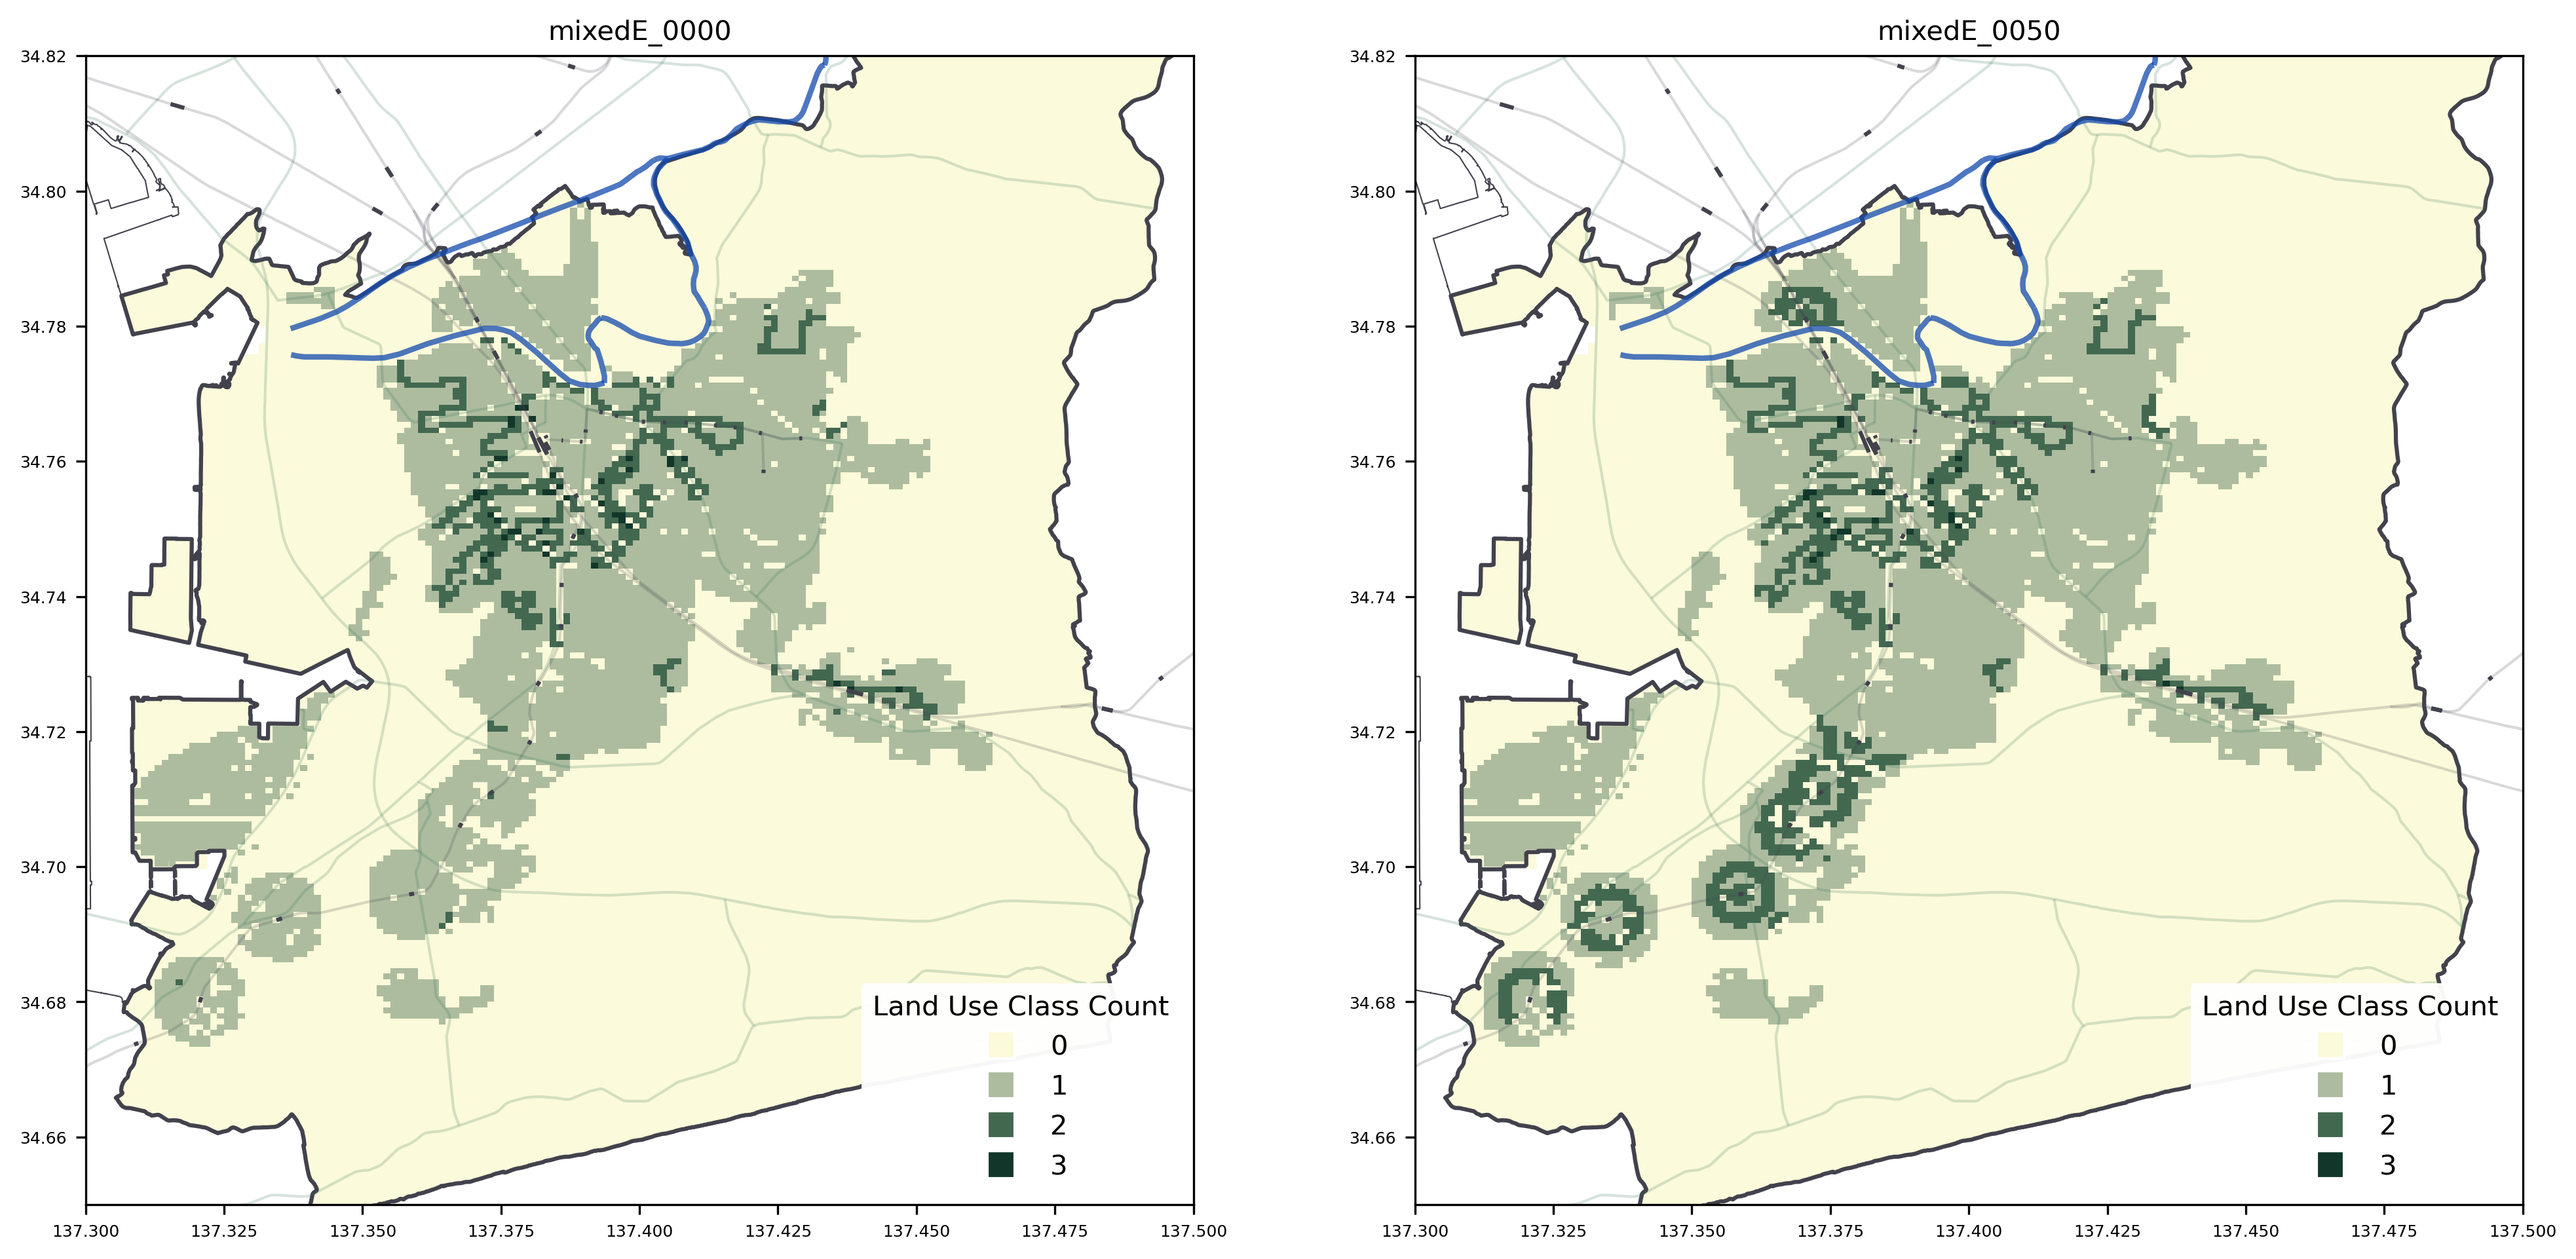

In [334]:
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

## merge scenario data to shp
#check data type
grid['mesh'] = grid['mesh'].astype(str)
scenario['ID'] = scenario['ID'].astype(str)

# #scenario
scenario_list = ['mh01', 'mh02', 'mh03', 'mh04', 'mh06', 'mh07']
scenario['all'] = scenario[scenario_list].gt(0).any(axis=1).astype(int)

# scenario list for label
scenario_listlabel = ['all', 'mh01', 'mh02', 'mh03', 'mh04', 'mh06', 'mh07']

# spatial extent
min_lon, max_lon = 137.3, 137.5
min_lat, max_lat = 34.65, 34.82

# merge grid shapefile and scenario CSV files
gridscenario = pd.merge(grid, scenario, left_on='mesh', right_on='ID')

# setting the extent of geometry
geometry = [Polygon([(min_lon, min_lat), (max_lon, min_lat), (max_lon, max_lat), (min_lon, max_lat)])]

# blue gradation
colors = ["#FBFADA", "#ADBC9F","#436850", "#12372A"]
cmap = LinearSegmentedColormap.from_list("red_gradient", colors, N=4)

landuse = ['optL','optS','optM']

h = 0
s = 0
e = 0
q = 0
z = 0

# setting the campus
fig, ax = plt.subplots(1, 2, figsize=(16, 8), dpi = 300)

E = [0,5]
for e in E:

    result = pd.read_csv(f'{cp}/model/out_01/f/f{h}{s}{e}{q}.csv')
    result['ID'] = result['ID'].astype(str)

    result_mixed = result.copy() 
    result_mixed[landuse].fillna(0)
    result_mixed['mixed'] = (result_mixed[landuse] > 0).sum(axis=1)

    grid_opt = pd.merge(gridscenario, result_mixed, left_on='mesh', right_on='ID')

    #campus
    fig.subplots_adjust(wspace=0.2,hspace = 0.5) 

    # filtering scenario[scenario_list[s]]>0
    gcs = gridscenario[gridscenario['all'].fillna(0) != 0]

    # city boundary
    bdr.plot(ax=ax[z], color='white', edgecolor='#42424d', linewidth=0.5)

    # target city
    bdr_target_city.boundary.plot(ax=ax[z], facecolor='none', edgecolor='#42424d', alpha=1)

    # land classification
    lc.plot(ax=ax[z], facecolor='#42424d', alpha=0.1)

    #result
    min_value = 0
    max_value = 3

    # filtering dataframe plot
    grid_opt.plot(ax=ax[z], column = 'mixed', cmap = cmap, linewidth=0, edgecolor='none')

    # road
    road.plot(ax=ax[z], color='#337357', alpha=0.2, linewidth=1, label='Road')

    # station
    station.plot(ax=ax[z], color='#42424d', alpha=1, markersize=5, label='Station')

    # railroad
    railroad.plot(ax=ax[z], color='#42424d', alpha=0.2, linewidth=1, label='Railroad')

    # river
    river.plot(ax=ax[z], color='#144baf', alpha=0.5, linewidth=2, label='Toyokawa River')
    river.plot(ax=ax[z], color='#144baf', alpha=0.5, linewidth=2, label='Toyokawa River')

    # set xlim and ylim for each subplot
    ax[z].set_xlim(min_lon, max_lon)
    ax[z].set_ylim(min_lat, max_lat)
    ax[z].set_title(f'mixedE_{h}{s}{e}{q}', fontsize=10)
    ax[z].tick_params(axis='x', labelsize=6)
    ax[z].tick_params(axis='y', labelsize=6) 
    selected_labels = [0,1,2,3]

    # Create legend handles only for selected labels
    selected_handles = [plt.Line2D([1], [1], marker='s', color='w', label=selected_labels[i], 
                                    markerfacecolor=colors[i], markersize=10) for i in selected_labels]

    # Create a second legend for other data
    handles, labels = ax[z].get_legend_handles_labels()

    legend1 = ax[z].legend(handles=selected_handles, loc='lower right', title='Land Use Class Count')
    ax[z].add_artist(legend1)
    legend1.get_frame().set_linewidth(0)  # This line removes the border around the legend box

    z += 1
plt.savefig(cp + 'Visualisation/fig/'+ f'mixedE_0000_0050' + '.png', bbox_inches='tight')

#plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.hist(result_mixed['mixed'], bins=3)
print(result_mixed['mixed'].value_counts())

plt.show() 


In [ ]:
result_mixed[result_mixed['mixed']==1]

## Average Land use

In [ ]:
result = pd.read_csv('/Users/fukonakai/Documents/GitHub/optLanduse/Analysis/csv/csvt.csv',encoding=encoding)

In [ ]:
optM = result.filter(like='optM')
optS = result.filter(like='optS')
optL = result.filter(like='optL')

In [ ]:
optMdf = pd.concat([result.iloc[:,0], 
            optM.mean(axis=1),
            optM.sum(axis=1),
            optM.apply(lambda x: (x != 0).sum(), axis=1)], axis=1)
optMdf.columns = ['ID', 'Mean', 'Sum', 'Non-zero Count']

In [ ]:
optSdf = pd.concat([result.iloc[:,0], 
            optS.mean(axis=1),
            optS.sum(axis=1),
            optS.apply(lambda x: (x != 0).sum(), axis=1)], axis=1)
optSdf.columns = ['ID', 'Mean', 'Sum', 'Non-zero Count']

In [ ]:
optLdf = pd.concat([result.iloc[:,0], 
            optL.mean(axis=1),
            optL.sum(axis=1),
            optS.apply(lambda x: (x != 0).sum(), axis=1)], axis=1)
optLdf.columns = ['ID', 'Mean', 'Sum', 'Non-zero Count']

In [ ]:
from matplotlib.colors import LinearSegmentedColormap

result = pd.read_csv(cp + 'Analysis/csv/csvt.csv', encoding=encoding)

merged_df = pd.DataFrame(result.iloc[:, 0])

U = ['L','S','M']
H = [2]
S = [0]
E = [0,3]
Q = [0,1,2]

landuse = ['optL','optS','optM']

for e in E:
    for u in [0,1,2]:
        opt = result.filter(like=f'opt{U[u]}')
        opt = opt[[col for col in opt.columns if len(col) >= 13 and col[12] == f'{e}']]

        optdf = pd.concat([result.iloc[:,0], 
                    # opt.mean(axis=1),
                    # opt.sum(axis=1),
                    opt.apply(lambda x: (x > 0).sum(),axis=1),
                    opt.apply(lambda x: (x == 0).sum(),axis=1),
                    opt.apply(lambda x: (x < 0).sum(), axis=1)], axis=1)
        optdf.columns = ['ID', f'posivie Count{U[u]}{e}', f'equal Count{U[u]}{e}', f'negative Count{U[u]}{e}']
        
        merged_df = pd.merge(merged_df, optdf, left_on='ID', right_on='ID')

    optdfA = merged_df 

## merge scenario data to shp
#check data type
grid['mesh'] = grid['mesh'].astype(str)
scenario['ID'] = scenario['ID'].astype(str)
optdfA['ID'] = optdfA['ID'].astype(str)

# #scenario
scenario_list = ['mh01', 'mh02', 'mh03', 'mh04', 'mh06', 'mh07']
scenario['all'] = scenario[scenario_list].gt(0).any(axis=1).astype(int)

# merge grid shapefile and scenario CSV files
gridscenario = pd.merge(grid, scenario, left_on='mesh', right_on='ID')

grid_opt = pd.merge(gridscenario, optdfA, left_on='mesh', right_on='ID')

# scenario list for label
scenario_listlabel = ['all', 'mh01', 'mh02', 'mh03', 'mh04', 'mh06', 'mh07']

# spatial extent
min_lon, max_lon = 137.3, 137.5
min_lat, max_lat = 34.65, 34.82

# setting the extent of geometry
geometry = [Polygon([(min_lon, min_lat), (max_lon, min_lat), (max_lon, max_lat), (min_lon, max_lat)])]

#colour map
colorsL = ['#9D99B3','#4d557b']  # from which color to which color?
colorsS = ['#F0A1A9','#e55b69']  # from which color to which color?
colorsM = ['#CCBCB2','#a78a79']  # from which color to which color?
cmap_name = 'custom_gradient'
n_bins = 100  # number of color bins
cmL = LinearSegmentedColormap.from_list(cmap_name, colorsL, N=n_bins)
cmS = LinearSegmentedColormap.from_list(cmap_name, colorsS, N=n_bins)
cmM = LinearSegmentedColormap.from_list(cmap_name, colorsM, N=n_bins)

# これらのカラーマップからなるリストを作成
colormaps = [cmL, cmS, cmM]

#read csv
csv_path_f = cp + 'Model/out_01/f/f3200.csv'

print(csv_path_f)
f = pd.read_csv(csv_path_f, encoding=encoding)

# check data type
f.loc[:, 'ID'] = f['ID'].astype(str)

# merge grid shapefile and scenario CSV files
grid_f = pd.merge(grid, f, left_on='mesh', right_on='ID')

#campus
fig,ax = plt.subplots(1, len(U), figsize=(20, 40), dpi = 120)

fig.subplots_adjust(wspace=0.2,hspace = 0.5) 

# filtering scenario[scenario_list[s]]>0
gcs = gridscenario[gridscenario['all'].fillna(0) != 0]
namelist = ['(i) residential', '(ii) commercial','(iii) industrial',]

for u in [0,1,2]:
    
    # city boundary
    bdr.plot(ax=ax[u], color='white', edgecolor='#42424d', linewidth=0.5)

    # target city
    bdr_target_city.boundary.plot(ax=ax[u], facecolor='none', edgecolor='#42424d', alpha=1)

    # land classification
    lc.plot(ax=ax[u], facecolor='#42424d', alpha=0.1)

    #result
    min_value = grid_f[landuse[u]].min()
    max_value = grid_f[landuse[u]].max()

    # filtering landuse[u]>0
    grid_f_filtered = grid_f[grid_f[landuse[u]] != 0]

    # filtering dataframe plot
    grid_f_filtered.plot(ax=ax[u], column=landuse[u], cmap=colormaps[u], vmin=min_value, vmax=max_value)

    # road
    road.plot(ax=ax[u], color='#337357', alpha=0.2, linewidth=1, label='Road')

    # station
    station.plot(ax=ax[u], color='#42424d', alpha=1, markersize=5, label='Station')

    # railroad
    railroad.plot(ax=ax[u], color='#42424d', alpha=0.2, linewidth=1, label='Railroad')

    # # filtering dataframe plot
    # gcs.plot(ax=ax[u], edgecolor='none', color='#0B60B0', alpha=0.3)

    # river
    river.plot(ax=ax[u], color='#144baf', alpha=0.5, linewidth=2, label='Toyokawa River')
    river.plot(ax=ax[u], color='#144baf', alpha=0.5, linewidth=2, label='Toyokawa River')
    
     # set xlim and ylim for each subplot
    ax[u].set_xlim(min_lon, max_lon)
    ax[u].set_ylim(min_lat, max_lat)
    ax[u].set_title(namelist[u], fontsize=20)

    # Create a second legend for other data
    handles, labels = ax[u].get_legend_handles_labels()
    legend2 = ax[u].legend(handles[0:4], labels[0:4], loc='upper right')
    legend2.get_frame().set_linewidth(0)  # This line removes the border around the legend box

#plt.savefig(cp + '/fig/3in1/' +str(h)+str(s)+str(e)+'.png')
#plt.savefig(cp + 'Visualisation/fig/optbase_E025.png', bbox_inches='tight')
#plt.savefig(cp + 'Visualisation/fig/optbaseline.png', bbox_inches='tight')
plt.savefig(cp + 'Visualisation/fig/opt3200_.png', bbox_inches='tight')

#plt.show()

In [ ]:
from matplotlib.colors import LinearSegmentedColormap

result = pd.read_csv(cp + 'Analysis/csv/csvt.csv', encoding=encoding)

merged_df = pd.DataFrame(result.iloc[:, 0])

U = ['L','S','M']
H = [2]
S = [0,1,2,5]
E = [0,5]
mc = [232730,50000,100000,200000,300000,400000,500000,600000,700000]
Q = [0,1,4,6]

landuse = ['optL','optS','optM']

for e in E:
    for u in [0,1,2]:
        opt = result.filter(like=f'opt{U[u]}')
        opt = opt[[col for col in opt.columns if len(col) >= 9 and col[7] == f'{e}']]
        optdf = pd.DataFrame()
        optdf = pd.concat([result.iloc[:,0], 
                    opt.mean(axis=1),
                    opt.sum(axis=1),
                    opt.apply(lambda x: (x != 0).sum(), axis=1)], axis=1)

        optdf.columns = ['ID', f'mean{U[u]}{e}', f'sum{U[u]}{e}', f'non-zero{U[u]}{e}']
        
        merged_df = pd.merge(merged_df, optdf, left_on='ID', right_on='ID')

    optdfA = merged_df

## merge scenario data to shp
#check data type
grid['mesh'] = grid['mesh'].astype(str)
scenario['ID'] = scenario['ID'].astype(str)
optdfA['ID'] = optdfA['ID'].astype(str)

# #scenario
scenario_list = ['mh01', 'mh02', 'mh03', 'mh04', 'mh06', 'mh07']
scenario['all'] = scenario[scenario_list].gt(0).any(axis=1).astype(int)

# merge grid shapefile and scenario CSV files
gridscenario = pd.merge(grid, scenario, left_on='mesh', right_on='ID')

grid_opt = pd.merge(gridscenario, optdfA, left_on='mesh', right_on='ID')

# scenario list for label
scenario_listlabel = ['all', 'mh01', 'mh02', 'mh03', 'mh04', 'mh06', 'mh07']

# spatial extent
min_lon, max_lon = 137.3, 137.5
min_lat, max_lat = 34.65, 34.82

# setting the extent of geometry
geometry = [Polygon([(min_lon, min_lat), (max_lon, min_lat), (max_lon, max_lat), (min_lon, max_lat)])]

#colour map
colorsL = ['#9D99B3','#4d557b']  # from which color to which color?
colorsS = ['#F0A1A9','#e55b69']  # from which color to which color?
colorsM = ['#CCBCB2','#a78a79']  # from which color to which color?
cmap_name = 'custom_gradient'
n_bins = 100  # number of color bins
cmL = LinearSegmentedColormap.from_list(cmap_name, colorsL, N=n_bins)
cmS = LinearSegmentedColormap.from_list(cmap_name, colorsS, N=n_bins)
cmM = LinearSegmentedColormap.from_list(cmap_name, colorsM, N=n_bins)

# これらのカラーマップからなるリストを作成
colormaps = [cmL, cmS, cmM]

#campus
fig,ax = plt.subplots(1, len(U), figsize=(20, 40), dpi = 120)

fig.subplots_adjust(wspace=0.2,hspace = 0.5) 

# filtering scenario[scenario_list[s]]>0
gcs = gridscenario[gridscenario['all'].fillna(0) != 0]
namelist = ['(i) residential', '(ii) commercial','(iii) industrial',]

for e in E:
    for u in [0,1,2]:
        
        # city boundary
        bdr.plot(ax=ax[u], color='white', edgecolor='#42424d', linewidth=0.5)

        # target city
        bdr_target_city.boundary.plot(ax=ax[u], facecolor='none', edgecolor='#42424d', alpha=1)

        # land classification
        lc.plot(ax=ax[u], facecolor='#42424d', alpha=0.1)

        #result
        min_value = optdfA[f'non-zero{U[u]}{e}'].min()
        max_value = optdfA[f'non-zero{U[u]}{e}'].max()

        # filtering landuse[u]>0
        grid_f_filtered = grid_opt[grid_opt[f'non-zero{U[u]}{e}'] != 0]

        # filtering dataframe plot
        grid_f_filtered.plot(ax=ax[u], column=f'non-zero{U[u]}{e}', cmap=colormaps[u], vmin=min_value, vmax=max_value)

        # road
        road.plot(ax=ax[u], color='#337357', alpha=0.2, linewidth=1, label='Road')

        # station
        station.plot(ax=ax[u], color='#42424d', alpha=1, markersize=5, label='Station')

        # railroad
        railroad.plot(ax=ax[u], color='#42424d', alpha=0.2, linewidth=1, label='Railroad')

        # filtering dataframe plot
        gcs.plot(ax=ax[u], edgecolor='none', color='#0B60B0', alpha=0.3)

        # river
        river.plot(ax=ax[u], color='#144baf', alpha=0.5, linewidth=2, label='Toyokawa River')
        river.plot(ax=ax[u], color='#144baf', alpha=0.5, linewidth=2, label='Toyokawa River')
        
        # set xlim and ylim for each subplot
        ax[u].set_xlim(min_lon, max_lon)
        ax[u].set_ylim(min_lat, max_lat)
        ax[u].set_title(namelist[u], fontsize=20)

        # Create a second legend for other data
        handles, labels = ax[u].get_legend_handles_labels()
        legend2 = ax[u].legend(handles[0:4], labels[0:4], loc='upper right')
        legend2.get_frame().set_linewidth(0)  # This line removes the border around the legend box

    #plt.savefig(cp + '/fig/3in1/' +str(h)+str(s)+str(e)+'.png')
    plt.savefig(cp + 'Visualisation/fig/opt'+ f'non-zeroE{e}' + '.png', bbox_inches='tight')

    #plt.show()

In [ ]:
# 
# single scenario
# 

from matplotlib.colors import LinearSegmentedColormap

## merge scenario data to shp
#check data type
grid['mesh'] = grid['mesh'].astype(str)
scenario['ID'] = scenario['ID'].astype(str)

# #scenario
scenario_list = ['mh01', 'mh02', 'mh03', 'mh04', 'mh06', 'mh07']
scenario['all'] = scenario[scenario_list].gt(0).any(axis=1).astype(int)

# scenario list for label
scenario_listlabel = ['all', 'mh01', 'mh02', 'mh03', 'mh04', 'mh06', 'mh07']

# spatial extent
min_lon, max_lon = 137.3, 137.5
min_lat, max_lat = 34.65, 34.82

# merge grid shapefile and scenario CSV files
gridscenario = pd.merge(grid, scenario, left_on='mesh', right_on='ID')

# setting the extent of geometry
geometry = [Polygon([(min_lon, min_lat), (max_lon, min_lat), (max_lon, max_lat), (min_lon, max_lat)])]

#colour map
colorsL = ['#9D99B3','#4d557b']  # from which color to which color?
colorsS = ['#F0A1A9','#e55b69']  # from which color to which color?
colorsM = ['#CCBCB2','#a78a79']  # from which color to which color?
cmap_name = 'custom_gradient'
n_bins = 100  # number of color bins
cmL = LinearSegmentedColormap.from_list(cmap_name, colorsL, N=n_bins)
cmS = LinearSegmentedColormap.from_list(cmap_name, colorsS, N=n_bins)
cmM = LinearSegmentedColormap.from_list(cmap_name, colorsM, N=n_bins)

# colour map list
colormaps = [cmL, cmS, cmM]

h = 0
s = 0
q = 0

E = [0,1,2,3,4]

for e in E:

    result = pd.read_csv('/Users/fukonakai/Documents/GitHub/optLanduse/model/out_01/f/t' +str(h)+str(s)+str(e)+str(q)+'.csv')
    #result = pd.read_csv('/Users/fukonakai/Documents/GitHub/optLanduse/model/out_01/f/f0000.csv')
    result['ID'] = result['ID'].astype(str)

    grid_opt = pd.merge(gridscenario, result, left_on='mesh', right_on='ID')
    
    #campus
    fig,ax = plt.subplots(1, len(U), figsize=(20, 40), dpi = 120)
    fig.subplots_adjust(wspace=0.2,hspace = 0.5) 

    # filtering scenario[scenario_list[s]]>0
    gcs = gridscenario[gridscenario['all'].fillna(0) != 0]
    namelist = ['(i) residential', '(ii) commercial','(iii) industrial',]

    for u in [0,1,2]:
        
        # city boundary
        bdr.plot(ax=ax[u], color='white', edgecolor='#42424d', linewidth=0.5)

        # target city
        bdr_target_city.boundary.plot(ax=ax[u], facecolor='none', edgecolor='#42424d', alpha=1)

        # land classification
        lc.plot(ax=ax[u], facecolor='#42424d', alpha=0.1)

        #result
        # min_value = grid_opt[f'opt{U[u]}'].min()
        # max_value = grid_opt[f'opt{U[u]}'].max()
        min_value = 0
        max_value = 10000
        # filtering landuse[u]>0
        grid_f_filtered = grid_opt[grid_opt[f'opt{U[u]}'] != 0]

        # filtering dataframe plot
        grid_f_filtered.plot(ax=ax[u], column=f'opt{U[u]}', cmap=colormaps[u], vmin=min_value, vmax=max_value)

        # road
        road.plot(ax=ax[u], color='#337357', alpha=0.2, linewidth=1, label='Road')

        # station
        station.plot(ax=ax[u], color='#42424d', alpha=1, markersize=5, label='Station')

        # railroad
        railroad.plot(ax=ax[u], color='#42424d', alpha=0.2, linewidth=1, label='Railroad')

        # filtering dataframe plot
        gcs.plot(ax=ax[u], edgecolor='none', color='#0B60B0', alpha=0.3)

        # river
        river.plot(ax=ax[u], color='#144baf', alpha=0.5, linewidth=2, label='Toyokawa River')
        river.plot(ax=ax[u], color='#144baf', alpha=0.5, linewidth=2, label='Toyokawa River')
        
        # set xlim and ylim for each subplot
        ax[u].set_xlim(min_lon, max_lon)
        ax[u].set_ylim(min_lat, max_lat)
        ax[u].set_title(namelist[u], fontsize=20)

        # Create a second legend for other data
        handles, labels = ax[u].get_legend_handles_labels()
        legend2 = ax[u].legend(handles[0:4], labels[0:4], loc='upper right')
        legend2.get_frame().set_linewidth(0)  # This line removes the border around the legend box

    #plt.savefig(cp + '/fig/3in1/' +str(h)+str(s)+str(e)+'.png')
    plt.savefig(cp + 'Visualisation/fig/'+ f'opt_{h}{s}{e}{q}' + '.png', bbox_inches='tight')

    #plt.show()

In [ ]:
# 
# single scenario
# 
# 0.00と0.10の比較

from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

## merge scenario data to shp
#check data type
grid['mesh'] = grid['mesh'].astype(str)
scenario['ID'] = scenario['ID'].astype(str)

# #scenario
scenario_list = ['mh01', 'mh02', 'mh03', 'mh04', 'mh06', 'mh07']
scenario['all'] = scenario[scenario_list].gt(0).any(axis=1).astype(int)

# scenario list for label
scenario_listlabel = ['all', 'mh01', 'mh02', 'mh03', 'mh04', 'mh06', 'mh07']

# spatial extent
min_lon, max_lon = 137.3, 137.5
min_lat, max_lat = 34.65, 34.82

# merge grid shapefile and scenario CSV files
gridscenario = pd.merge(grid, scenario, left_on='mesh', right_on='ID')

# setting the extent of geometry
geometry = [Polygon([(min_lon, min_lat), (max_lon, min_lat), (max_lon, max_lat), (min_lon, max_lat)])]

colors = ['blue', 'red']
cmap = ListedColormap(colors)



# read data
result = pd.read_csv('/Users/fukonakai/Documents/GitHub/optLanduse/model/out_01/f/f0000.csv')
result['ID'] = result['ID'].astype(str)
df = pd.DataFrame(np.random.randn(5, 3), columns=['residential', 'commercial','industrial'])



I = [1]
for i in I:

    result025 = pd.read_csv(f'/Users/fukonakai/Documents/GitHub/optLanduse/model/out_01/f/f00{i}0.csv')
    result025['ID'] = result025['ID'].astype(str)

    diff = result.copy() 
    diff['optL'] = result['optL']-result025['optL']
    diff['optS'] = result['optS']-result025['optS']
    diff['optM'] = result['optM']-result025['optM']

    grid_opt = pd.merge(gridscenario, diff, left_on='mesh', right_on='ID')

    #campus
    fig,ax = plt.subplots(1, len(U), figsize=(20, 40), dpi = 120)
    fig.subplots_adjust(wspace=0.2,hspace = 0.5) 

    # filtering scenario[scenario_list[s]]>0
    gcs = gridscenario[gridscenario['all'].fillna(0) != 0]
    namelist = ['(i) residential', '(ii) commercial','(iii) industrial',]

    for u in [0,1,2]:
        
        # city boundary
        bdr.plot(ax=ax[u], color='white', edgecolor='#42424d', linewidth=0.5)

        # target city
        bdr_target_city.boundary.plot(ax=ax[u], facecolor='none', edgecolor='#42424d', alpha=1)

        # land classification
        lc.plot(ax=ax[u], facecolor='#42424d', alpha=0.1)

        #result
        # min_value = grid_opt[f'opt{U[u]}'].min()
        # max_value = grid_opt[f'opt{U[u]}'].max()
        min_value = -10000
        max_value = 10000

        # filtering landuse[u]>0
        grid_f_filtered = grid_opt[grid_opt[f'opt{U[u]}'] != 0]
        grid_f_filtered.loc[:, 'color'] = np.where(grid_f_filtered[f'opt{U[u]}'] > 0, 1, 0)

        # filtering dataframe plot
        #grid_f_filtered.plot(ax=ax[u], column=f'opt{U[u]}', cmap=color_map, vmin=min_value, vmax=max_value)
        grid_f_filtered.plot(ax=ax[u], column='color', cmap=cmap, linewidth=0, edgecolor='none')

        # Counting positive/negative grids
        positive_count = (grid_f_filtered[f'opt{U[u]}'] > 0).sum()
        negative_count = (grid_f_filtered[f'opt{U[u]}'] < 0).sum()

        df.iloc[i-1, u] = positive_count/negative_count

        # 結果を表示
        print(f"Positive count: {positive_count}")
        print(f"Negative count: {negative_count}")
        print(f"posi/nega: {positive_count/negative_count}")

        # road
        road.plot(ax=ax[u], color='#337357', alpha=0.2, linewidth=1, label='Road')

        # station
        station.plot(ax=ax[u], color='#42424d', alpha=1, markersize=5, label='Station')

        # railroad
        railroad.plot(ax=ax[u], color='#42424d', alpha=0.2, linewidth=1, label='Railroad')

        # filtering dataframe plot
        gcs.plot(ax=ax[u], edgecolor='none', color='#0B60B0', alpha=0.3)

        # river
        river.plot(ax=ax[u], color='#144baf', alpha=0.5, linewidth=2, label='Toyokawa River')
        river.plot(ax=ax[u], color='#144baf', alpha=0.5, linewidth=2, label='Toyokawa River')
        
        # set xlim and ylim for each subplot
        ax[u].set_xlim(min_lon, max_lon)
        ax[u].set_ylim(min_lat, max_lat)
        ax[u].set_title(namelist[u], fontsize=20)

        # Create a second legend for other data
        handles, labels = ax[u].get_legend_handles_labels()
        legend2 = ax[u].legend(handles[0:4], labels[0:4], loc='upper right')
        legend2.get_frame().set_linewidth(0)  # This line removes the border around the legend box

    #plt.savefig(cp + '/fig/3in1/' +str(h)+str(s)+str(e)+'.png')
    plt.savefig(cp + 'Visualisation/fig/'+ f'diff_0n{i}' + '.png', bbox_inches='tight')

    #plt.show()

In [ ]:
print(df)
df['alpha'] = ['0.05', '0.10', '0.15', '0.20', '0.25']
df.to_csv('/Users/fukonakai/Documents/GitHub/optLanduse/Analysis/csv/diff_equal.csv')

In [ ]:
# x軸の位置を設定
x_axis = np.arange(len(df))

# マルチバーチャートの描画
plt.bar(x_axis - 0.2, df['residential'], width=0.2, label='residential')
plt.bar(x_axis, df['commercial'], width=0.2, label='commercial')
plt.bar(x_axis + 0.2, df['industrial'], width=0.2, label='industrial')

# x軸のラベルを設定
plt.xticks(x_axis, df['alpha'])

# ラベルやタイトルを設定
plt.xlabel('$alpha$')
plt.ylabel("Number of Positive Grids / Number of Negative Grids")
plt.title('Differences between $alpha$ = 0.00 and 0.XX')

# 凡例を表示
plt.legend()

# グラフを表示
plt.show()

In [ ]:
# 
# single scenario
# 
# 0.00と0.10の比較

from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

# data read
df2 = pd.read_csv(cp + 'Model/in/Toyohashi_area_x0_original.csv')
df2 = df2.fillna(0)

## merge scenario data to shp
#check data type
grid['mesh'] = grid['mesh'].astype(str)
df2['ID'] = df2['ID'].astype(str)
df2['total'] = df2['NL']+df2['NS']+df2['NM']

print(df2['total'].unique())

grid_df2 = pd.merge(grid, df2, left_on='mesh', right_on='ID')

# spatial extent
min_lon, max_lon = 137.3, 137.5
min_lat, max_lat = 34.65, 34.82

# setting the extent of geometry
geometry = [Polygon([(min_lon, min_lat), (max_lon, min_lat), (max_lon, max_lat), (min_lon, max_lat)])]

cmap = 'viridis'

U = ['L','S','M']

#campus
fig,ax = plt.subplots(1, 1, figsize=(20, 40), dpi = 120)
fig.subplots_adjust(wspace=0.2,hspace = 0.5) 

# city boundary
bdr.plot(ax=ax, color='white', edgecolor='#42424d', linewidth=0.5)

# target city
bdr_target_city.boundary.plot(ax=ax, facecolor='none', edgecolor='#42424d', alpha=1)

min_value = 0
max_value = 10000

# filtering landuse[u]>0
grid_f_filtered = grid_df2[grid_df2['total'] != 0]

# filtering dataframe plot
grid_f_filtered.plot(ax=ax, column='total', cmap=cmap, linewidth=0, edgecolor='none')

# road
road.plot(ax=ax, color='#337357', alpha=0.2, linewidth=1, label='Road')

# station
station.plot(ax=ax, color='#42424d', alpha=1, markersize=5, label='Station')

# railroad
railroad.plot(ax=ax, color='#42424d', alpha=0.2, linewidth=1, label='Railroad')

#river
river.plot(ax=ax, color='#144baf', alpha=0.5, linewidth=2, label='Toyokawa River')
river.plot(ax=ax, color='#144baf', alpha=0.5, linewidth=2, label='Toyokawa River')

# set xlim and ylim for each subplot
ax.set_xlim(min_lon, max_lon)
ax.set_ylim(min_lat, max_lat)
ax.set_title('total', fontsize=20)

# Create a second legend for other data
handles, labels = ax.get_legend_handles_labels()
legend2 = ax.legend(handles[0:4], labels[0:4], loc='upper right')
legend2.get_frame().set_linewidth(0)  # This line removes the border around the legend box

plt.savefig(cp + 'Visualisation/fig/original_lu_total.png', bbox_inches='tight')

#plt.show()